In [7]:
# Define paths to the datasets
train_dir = r"C:\Users\ADMIN\Downloads\ANN_WS24_Assignment\TRAIN"
test2_dir = r"C:\Users\ADMIN\Downloads\ANN_WS24_Assignment\TEST2"
test_dir = r"C:\Users\ADMIN\Downloads\ANN_WS24_Assignment\TEST"

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [8]:
def load_dataset(base_path):
    """
    Load images from subfolders, assuming each subfolder represents a class
    """
    images = []
    labels = []

    for label_idx, label_folder in enumerate(sorted(os.listdir(base_path))):
        folder_path = os.path.join(base_path, label_folder)
        if os.path.isdir(folder_path):
            for img_file in os.listdir(folder_path):
                if img_file.endswith('.npy'):
                    img_path = os.path.join(folder_path, img_file)
                    img = np.load(img_path)
                    images.append(img.squeeze())
                    labels.append(label_idx)

    return np.array(images), np.array(labels)

X_train, y_train = load_dataset(train_dir)
X_test, y_test = load_dataset(test_dir)
X_test2, y_test2 = load_dataset(test2_dir)

In [4]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(6, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [9]:
def perform_eda(base_path):
    """
    Perform exploratory data analysis on the dataset
    """
    # Load the data
    images, labels = load_dataset(base_path)
    
    # Print dataset statistics
    print(f"\nDataset Statistics for {base_path}:")
    print(f"Total number of images: {len(images)}")
    print(f"Number of classes: {len(np.unique(labels))}")
    for i in range(len(np.unique(labels))):
        print(f"Class {i}: {np.sum(labels == i)} images")
    
    # Plot sample images before preprocessing
    plt.figure(figsize=(15, 8))
    plt.suptitle("Sample Images Before Preprocessing", fontsize=16)
    
    for i in range(6):  # Show one example from each class
        class_indices = np.where(labels == i)[0]
        if len(class_indices) > 0:
            sample_idx = np.random.choice(class_indices)
            plt.subplot(2, 3, i + 1)
            plt.imshow(images[sample_idx], cmap='gray')
            plt.title(f'Class {i}')
            plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Image statistics before preprocessing
    print("\nImage Statistics Before Preprocessing:")
    print(f"Image shape: {images[0].shape}")
    print(f"Pixel value range: [{images.min()}, {images.max()}]")
    print(f"Mean pixel value: {images.mean():.2f}")
    print(f"Std pixel value: {images.std():.2f}")
    
    # Plot pixel value distribution
    plt.figure(figsize=(10, 5))
    plt.hist(images.ravel(), bins=50, density=True, alpha=0.7)
    plt.title("Pixel Value Distribution Before Preprocessing")
    plt.xlabel("Pixel Value")
    plt.ylabel("Density")
    plt.show()
    
    # Preprocess images
    processed_images = preprocess_images(images)
    
    # Plot same sample images after preprocessing
    plt.figure(figsize=(15, 8))
    plt.suptitle("Sample Images After Preprocessing", fontsize=16)
    
    for i in range(6):
        class_indices = np.where(labels == i)[0]
        if len(class_indices) > 0:
            sample_idx = np.random.choice(class_indices)
            plt.subplot(2, 3, i + 1)
            plt.imshow(processed_images[sample_idx].squeeze(), cmap='gray')
            plt.title(f'Class {i}')
            plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Image statistics after preprocessing
    print("\nImage Statistics After Preprocessing:")
    print(f"Image shape: {processed_images[0].shape}")
    print(f"Pixel value range: [{processed_images.min()}, {processed_images.max()}]")
    print(f"Mean pixel value: {processed_images.mean():.2f}")
    print(f"Std pixel value: {processed_images.std():.2f}")
    
    # Plot processed pixel value distribution
    plt.figure(figsize=(10, 5))
    plt.hist(processed_images.ravel(), bins=50, density=True, alpha=0.7)
    plt.title("Pixel Value Distribution After Preprocessing")
    plt.xlabel("Pixel Value")
    plt.ylabel("Density")
    plt.show()
    
    return images, processed_images, labels


In [10]:
def preprocess_images(images):
    """
    Preprocess the images:
    1. Reshape to include channel dimension
    2. Normalize pixel values to [0, 1]
    3. Apply any additional preprocessing steps
    """
    # Reshape images to include channel dimension
    processed_images = images.reshape(-1, 28, 28, 1)
    
    # Normalize pixel values to [0, 1]
    processed_images = processed_images / 255.0
    
    # Optional: Add more preprocessing steps here if needed
    # For example:
    # - Contrast enhancement
    # - Noise reduction
    # - Data augmentation
    
    return processed_images


In [11]:
def visualize_augmentations(image, label):
    """
    Visualize different augmentations of a single image
    """
    # Create data augmentation layer
    data_augmentation = tf.keras.Sequential([
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),
    ])
    
    # Plot original and augmented images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Generate and plot augmented versions
    for i in range(3):
        augmented_image = data_augmentation(tf.expand_dims(image, 0))
        plt.subplot(1, 4, i + 2)
        plt.imshow(augmented_image[0].numpy().squeeze(), cmap='gray')
        plt.title(f'Augmented {i+1}')
        plt.axis('off')
    
    plt.suptitle(f'Original and Augmented Versions of Class {label}')
    plt.tight_layout()
    plt.show()



Analyzing TRAIN dataset...

Dataset Statistics for C:\Users\ADMIN\Downloads\ANN_WS24_Assignment\TRAIN:
Total number of images: 36000
Number of classes: 6
Class 0: 6000 images
Class 1: 6000 images
Class 2: 6000 images
Class 3: 6000 images
Class 4: 6000 images
Class 5: 6000 images


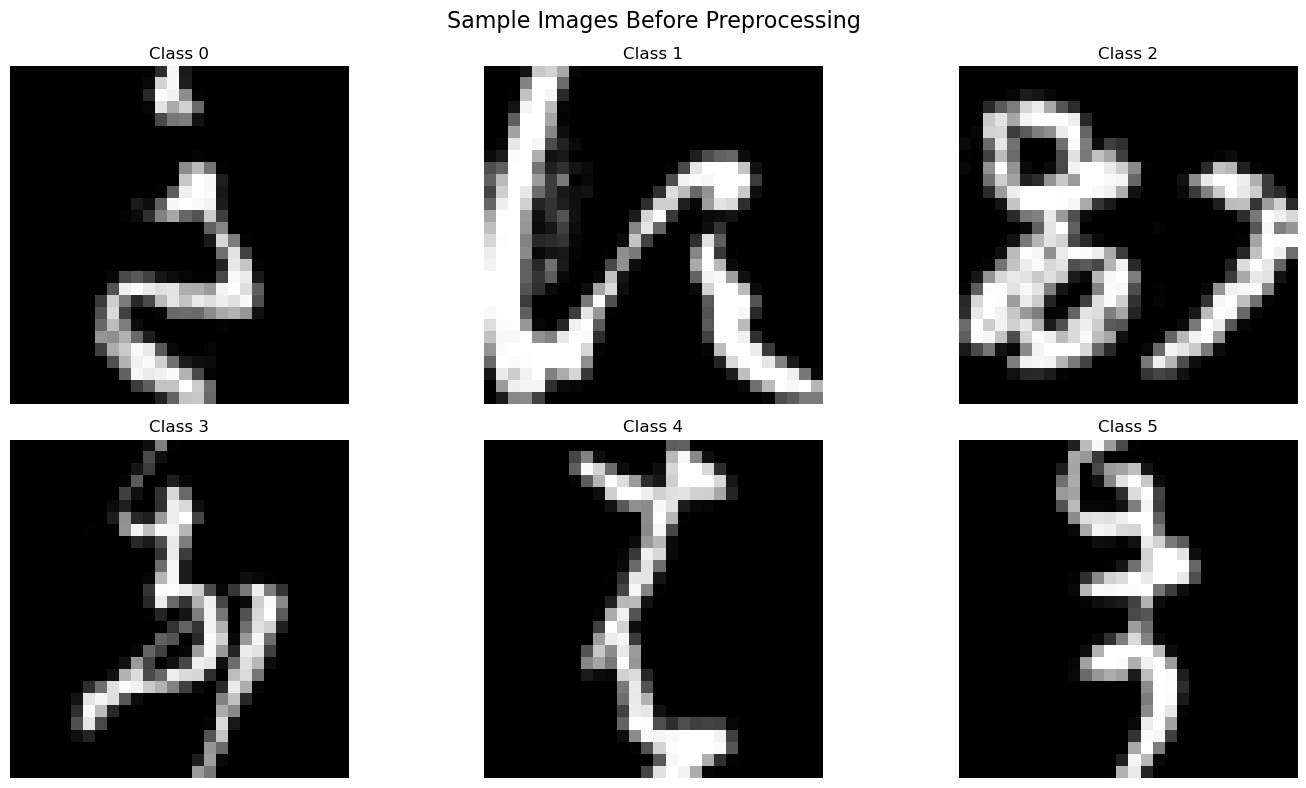


Image Statistics Before Preprocessing:
Image shape: (28, 28)
Pixel value range: [0.0, 1.0]
Mean pixel value: 0.19
Std pixel value: 0.35


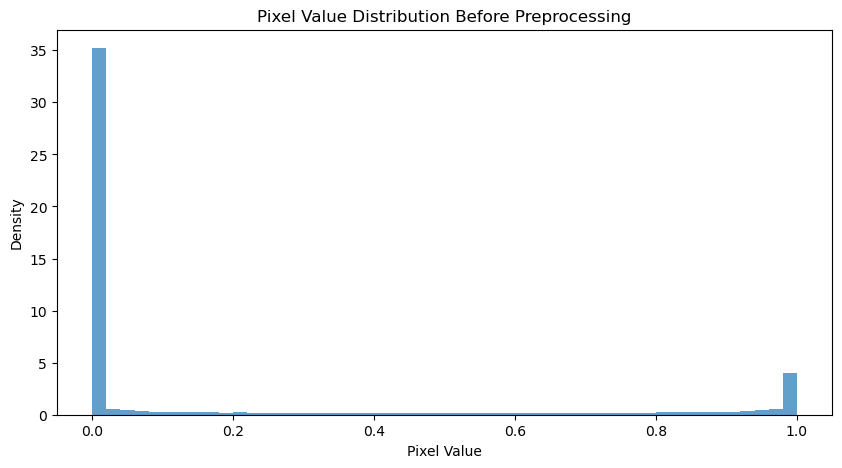

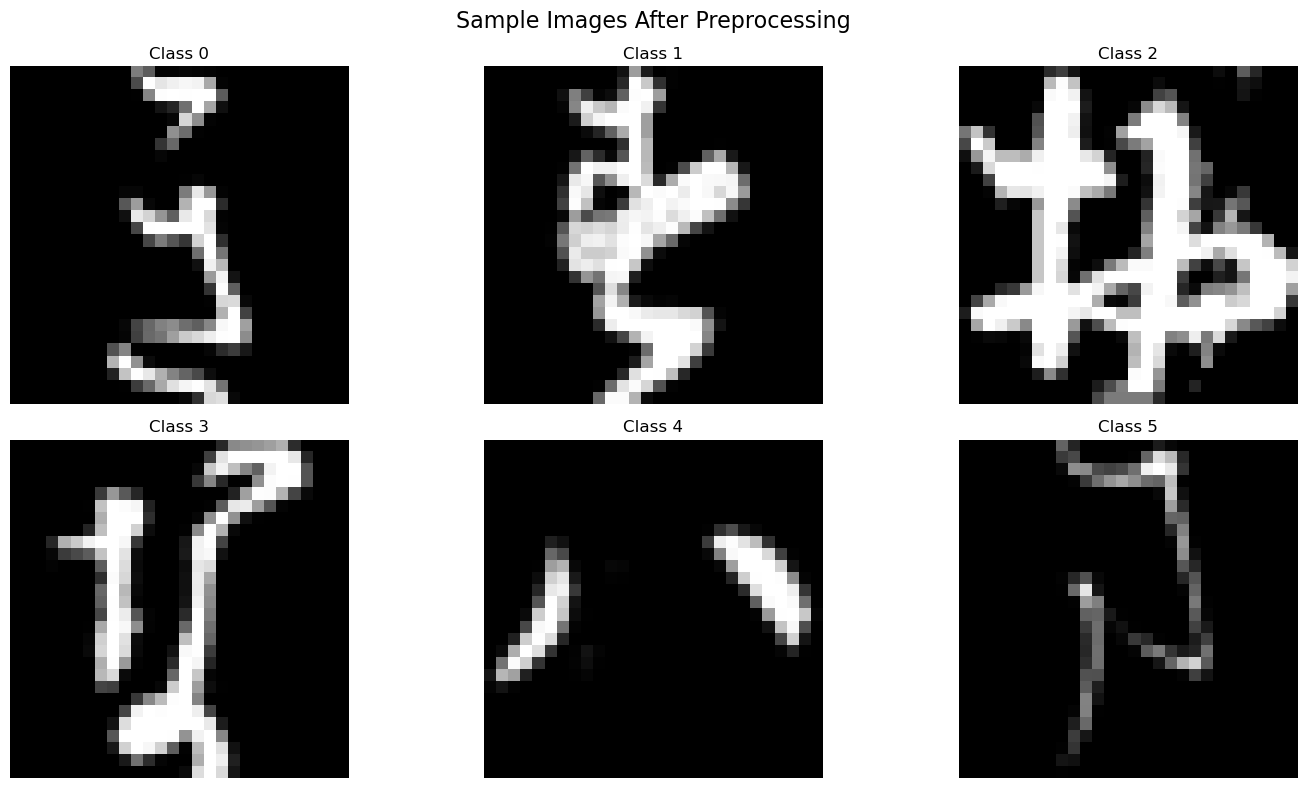


Image Statistics After Preprocessing:
Image shape: (28, 28, 1)
Pixel value range: [0.0, 0.003921568859368563]
Mean pixel value: 0.00
Std pixel value: 0.00


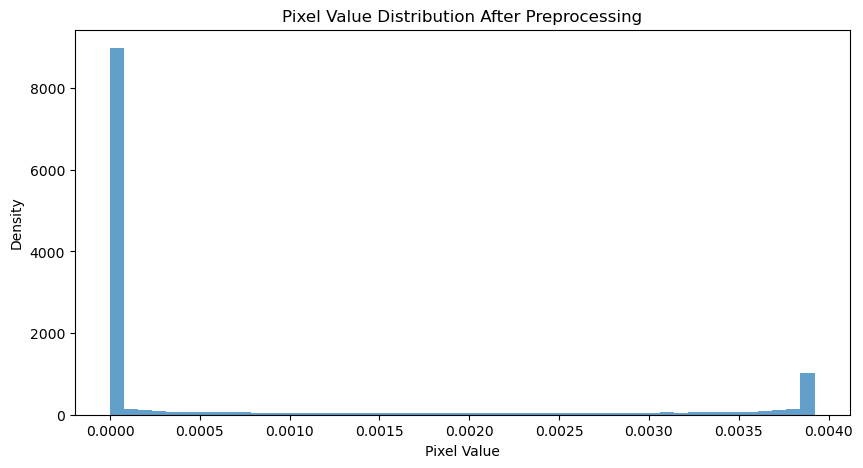


Visualization of possible augmentations for TRAIN dataset:


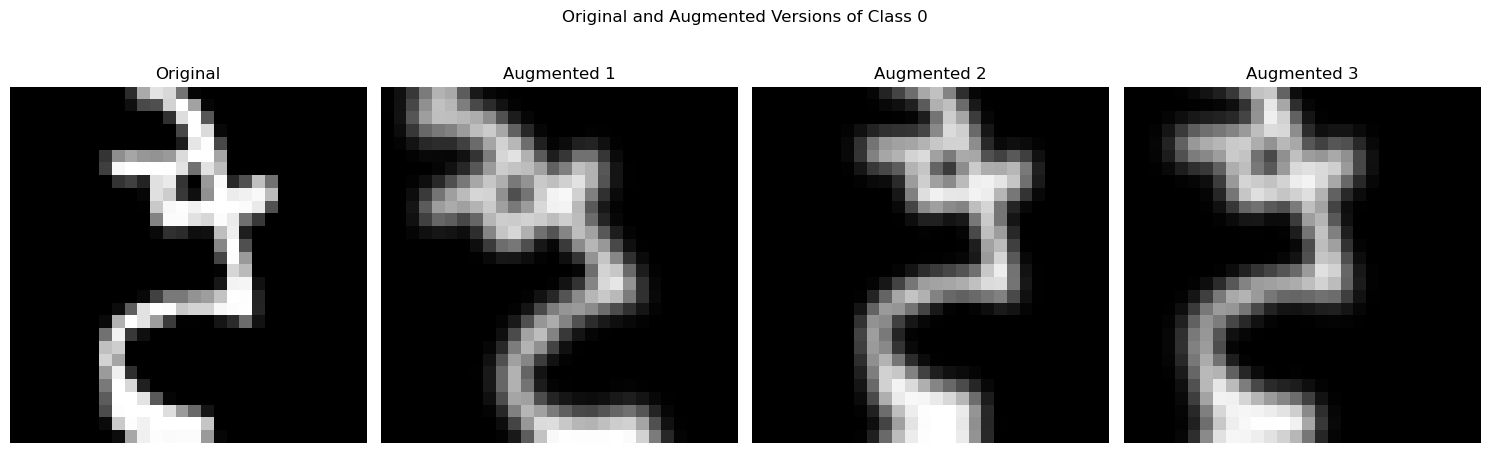

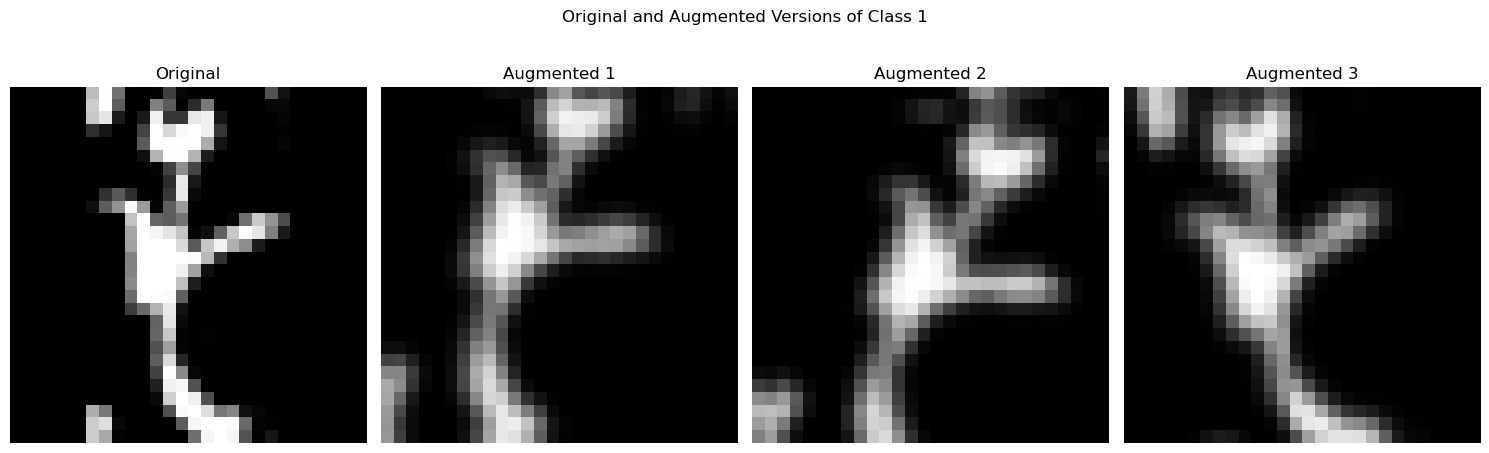

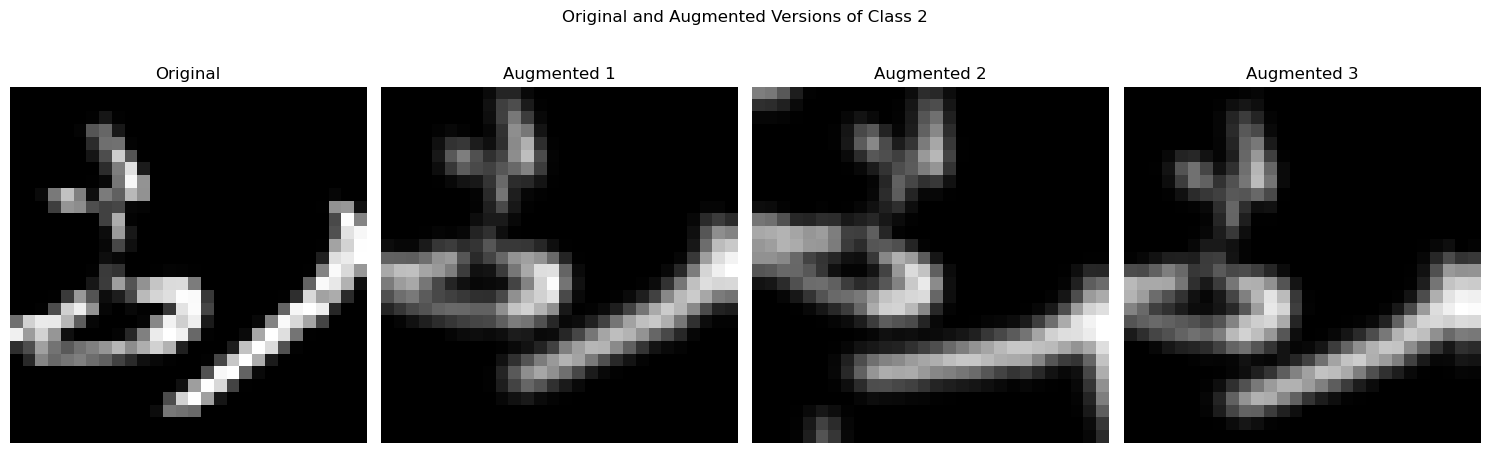

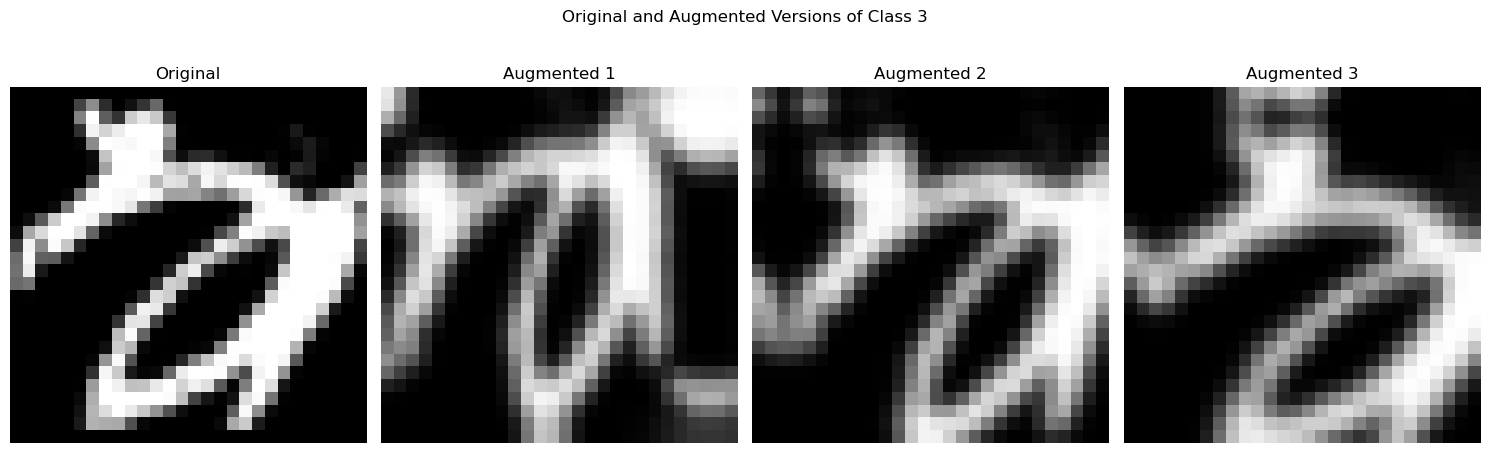

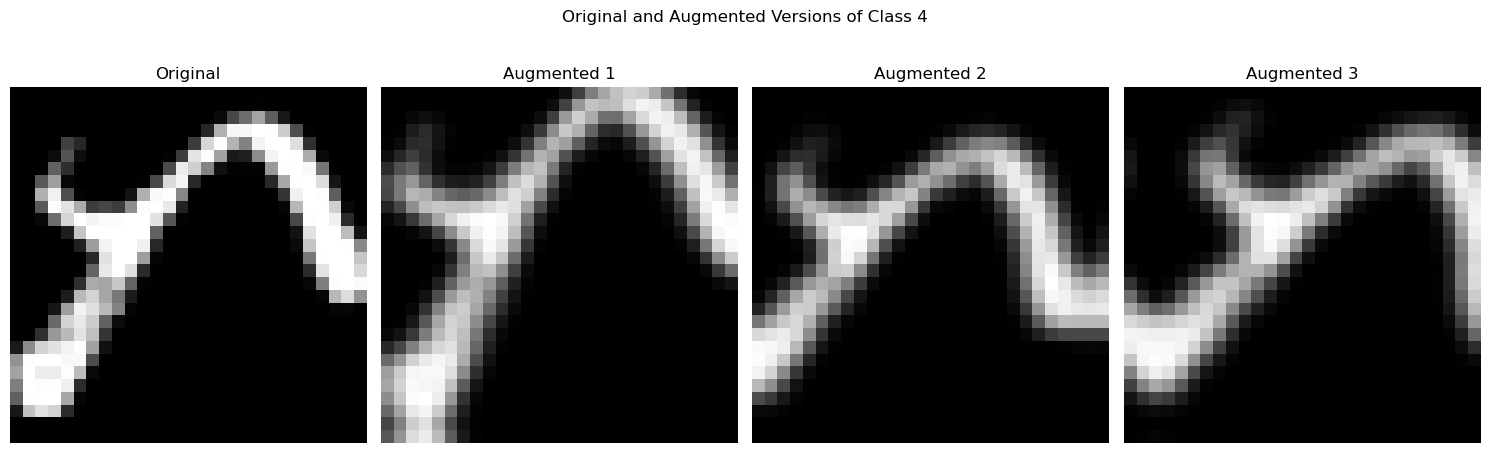

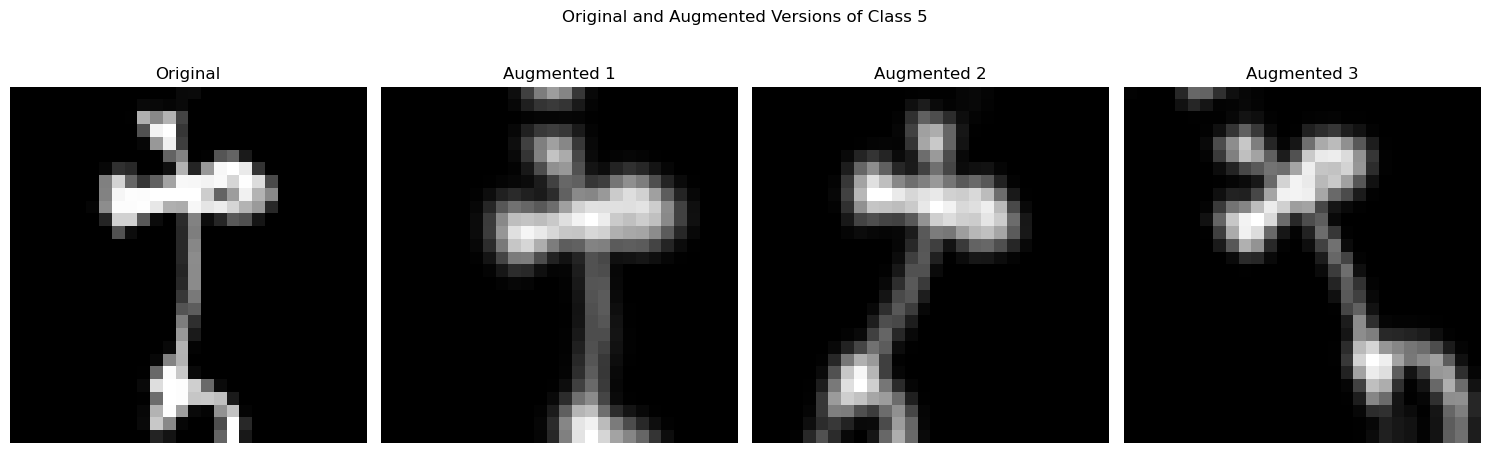


Analyzing TEST dataset...

Dataset Statistics for C:\Users\ADMIN\Downloads\ANN_WS24_Assignment\TEST:
Total number of images: 6000
Number of classes: 6
Class 0: 1000 images
Class 1: 1000 images
Class 2: 1000 images
Class 3: 1000 images
Class 4: 1000 images
Class 5: 1000 images


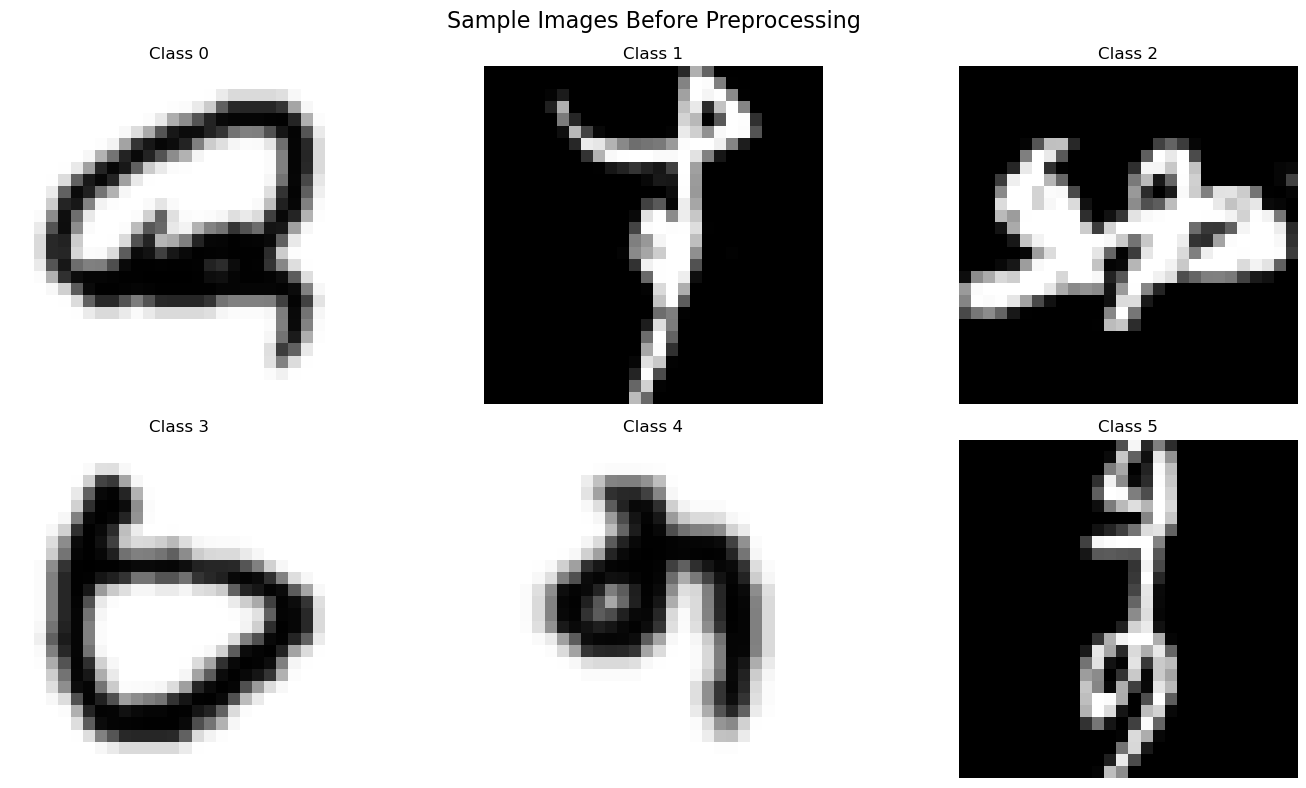


Image Statistics Before Preprocessing:
Image shape: (28, 28)
Pixel value range: [0.0, 1.0]
Mean pixel value: 0.50
Std pixel value: 0.47


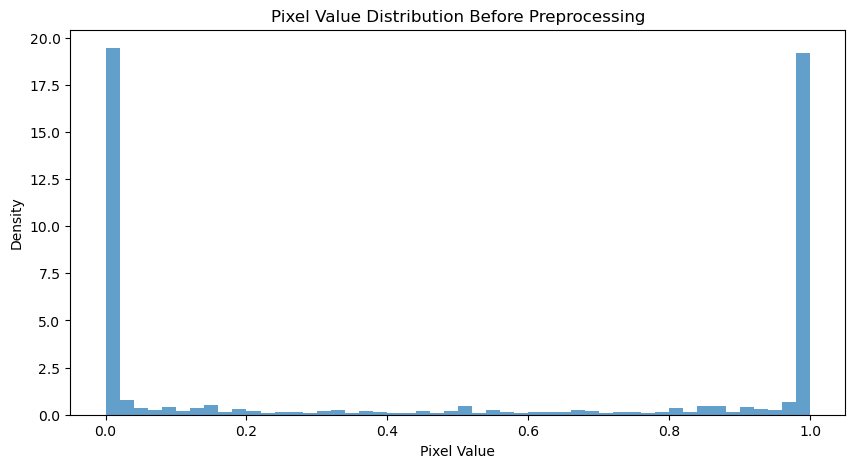

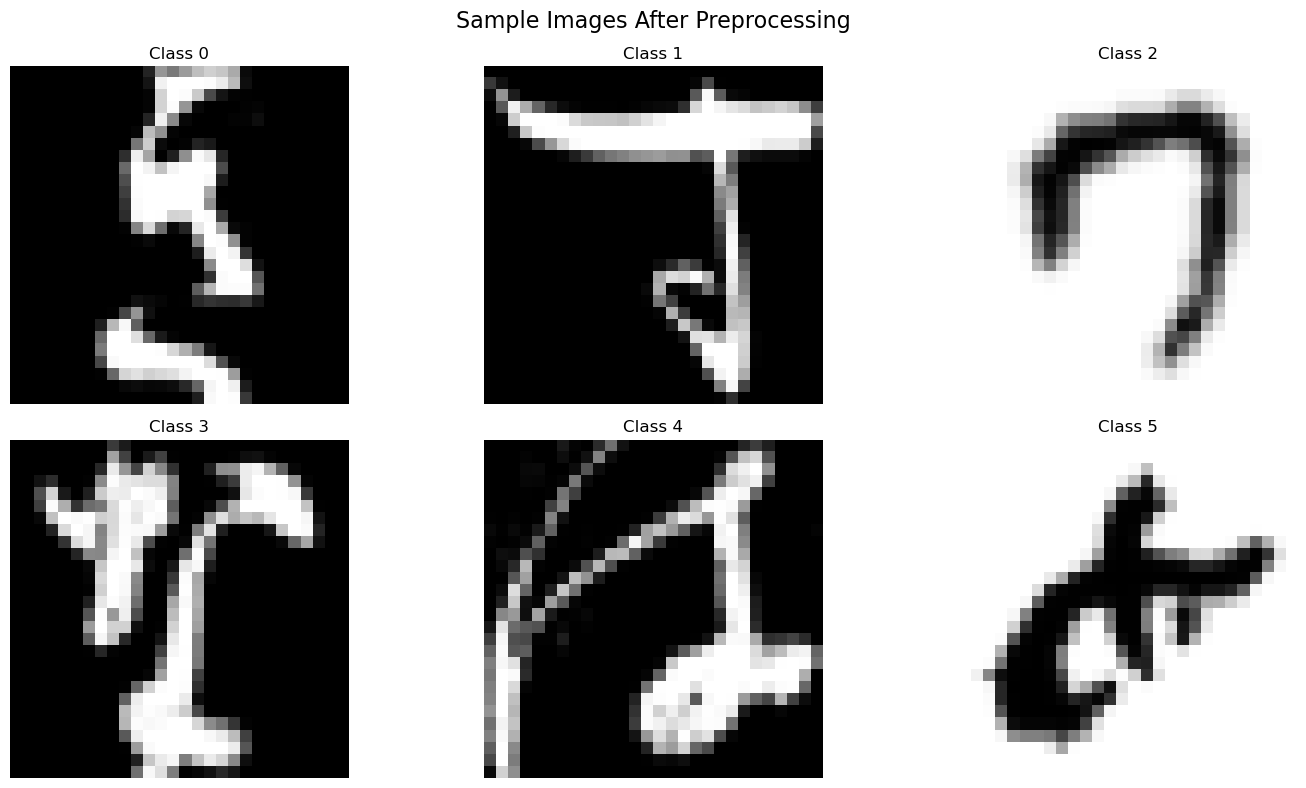


Image Statistics After Preprocessing:
Image shape: (28, 28, 1)
Pixel value range: [0.0, 0.003921568859368563]
Mean pixel value: 0.00
Std pixel value: 0.00


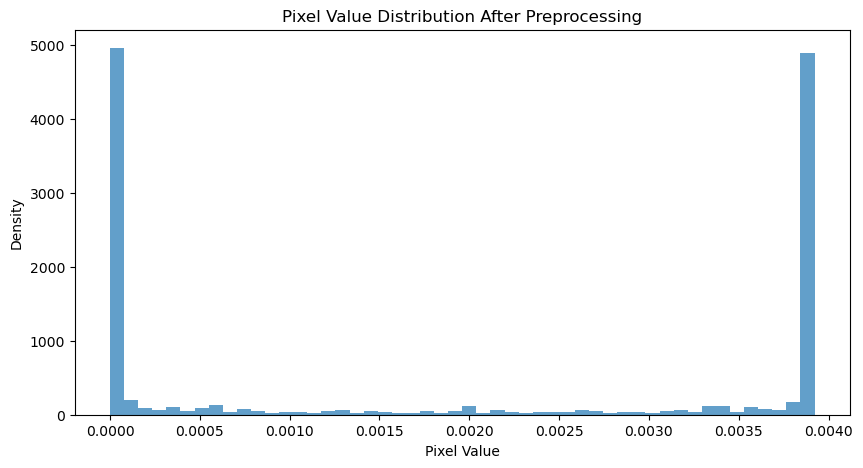


Visualization of possible augmentations for TEST dataset:


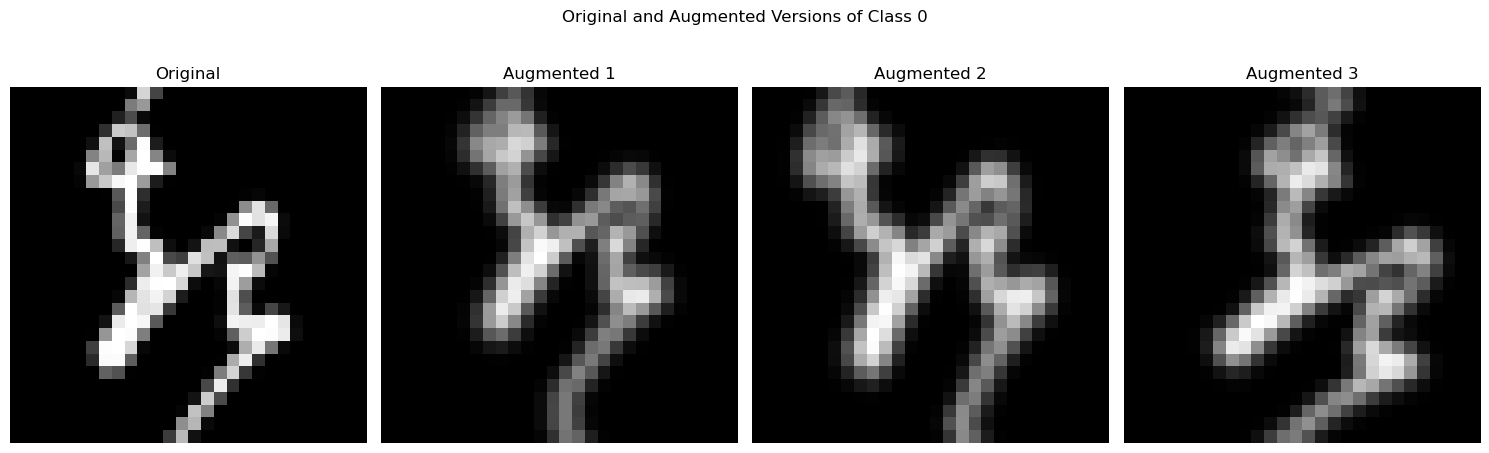

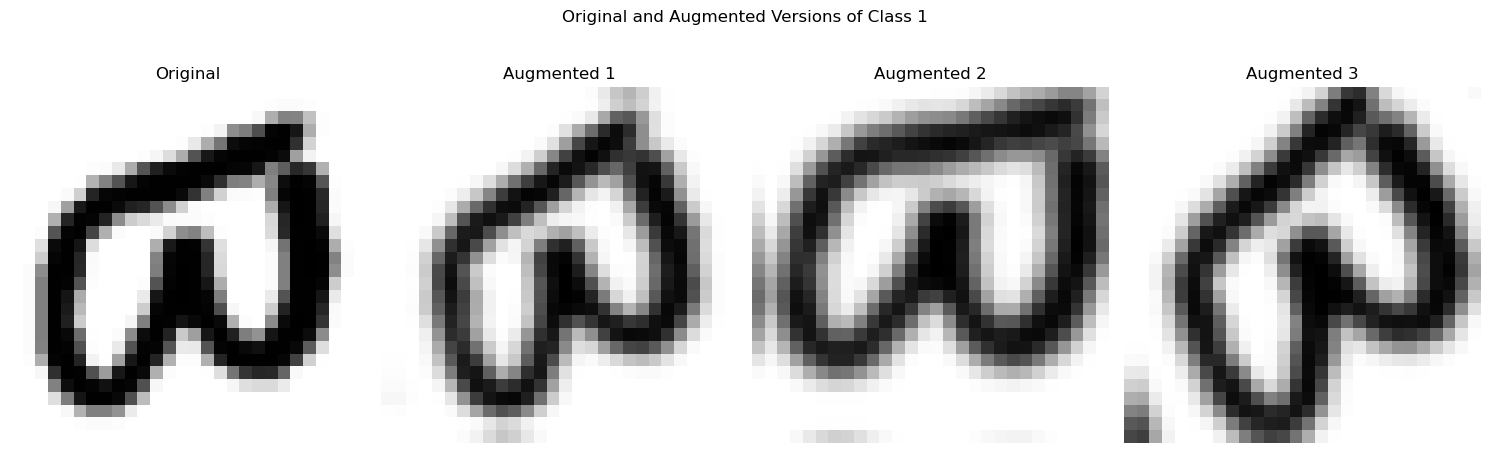

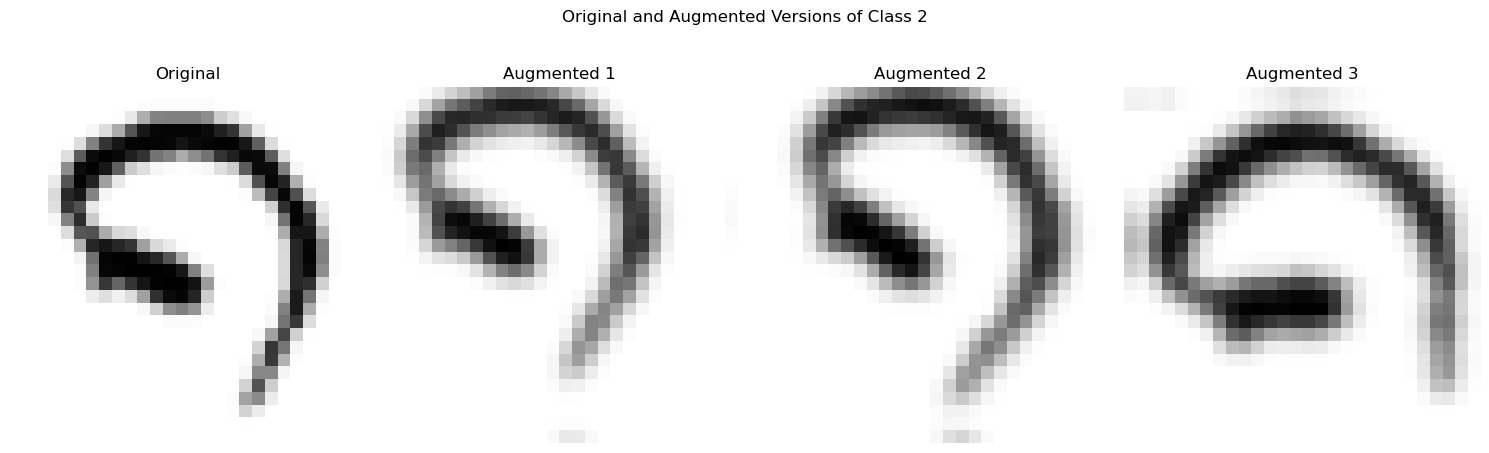

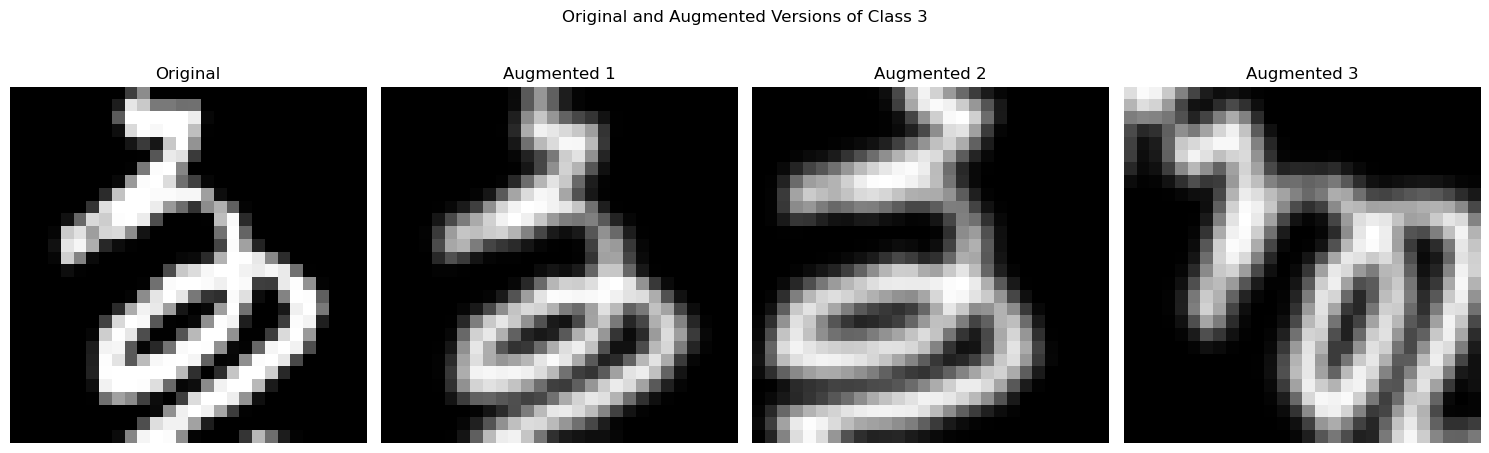

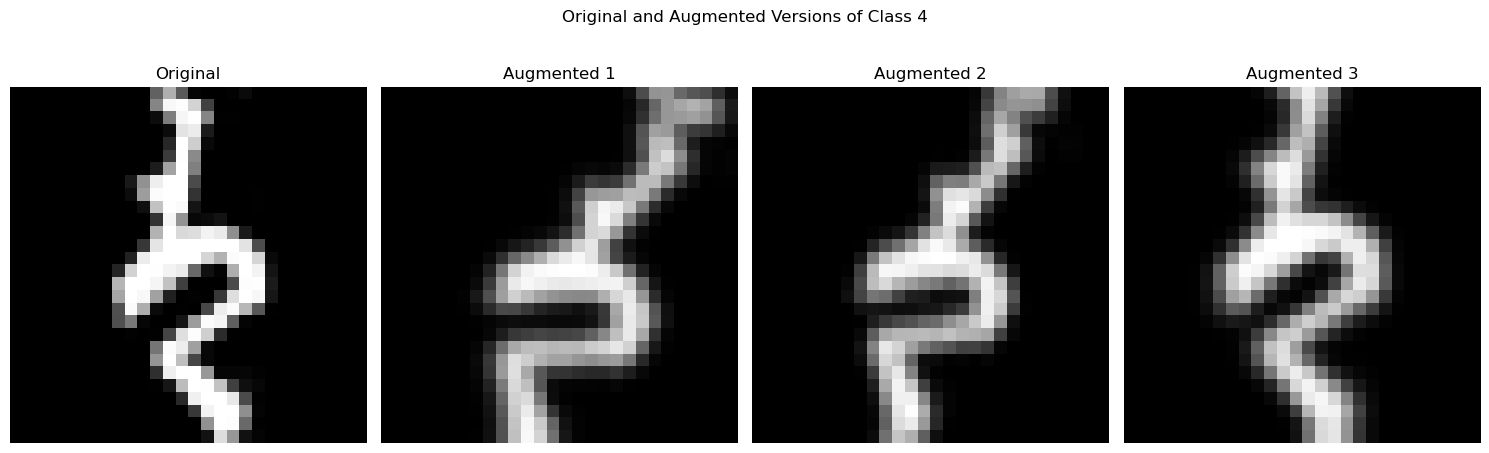

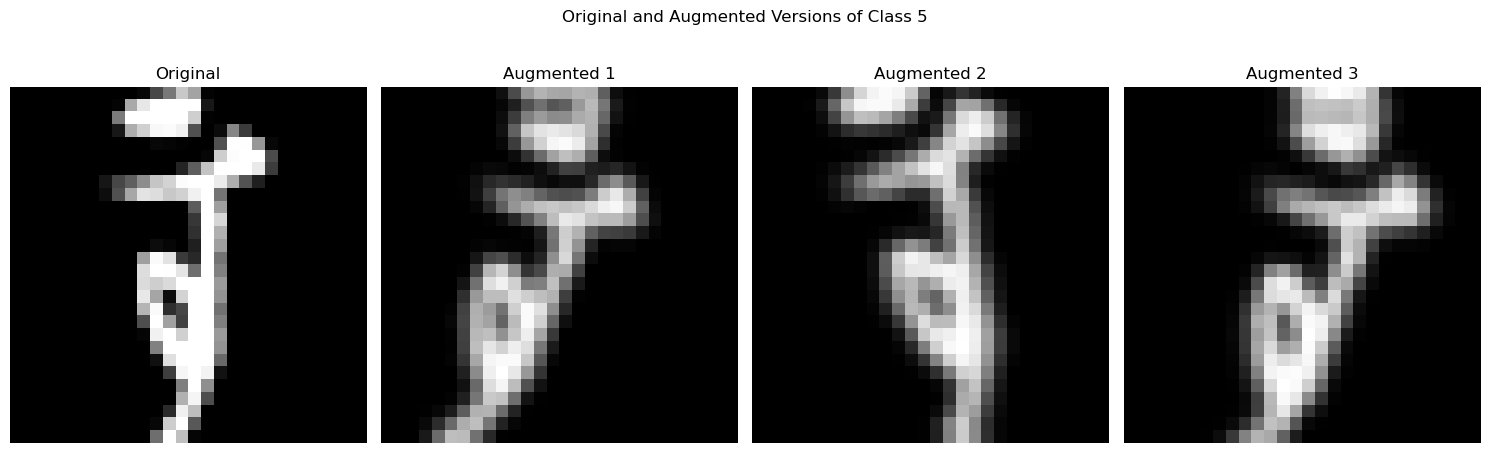


Analyzing TEST2 dataset...

Dataset Statistics for C:\Users\ADMIN\Downloads\ANN_WS24_Assignment\TEST2:
Total number of images: 6000
Number of classes: 6
Class 0: 1000 images
Class 1: 1000 images
Class 2: 1000 images
Class 3: 1000 images
Class 4: 1000 images
Class 5: 1000 images


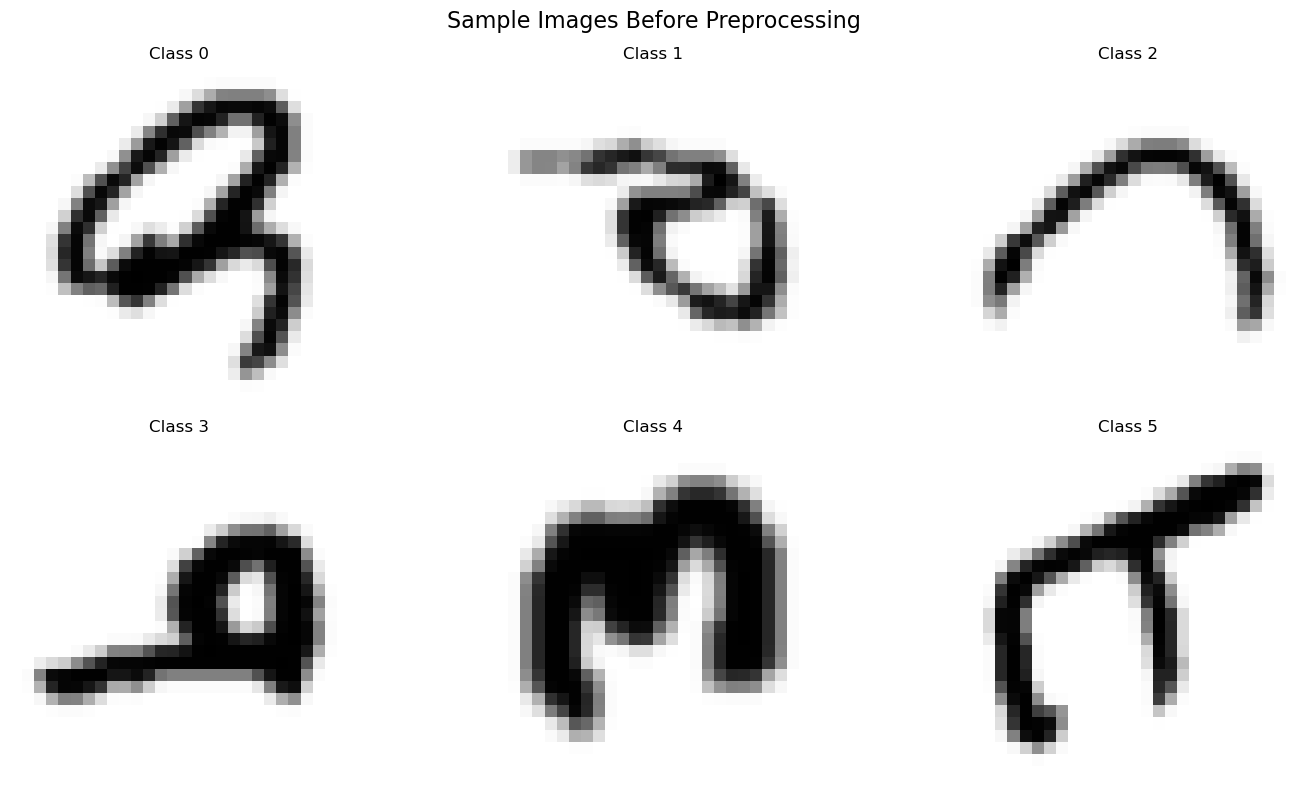


Image Statistics Before Preprocessing:
Image shape: (28, 28)
Pixel value range: [0.0, 1.0]
Mean pixel value: 0.81
Std pixel value: 0.34


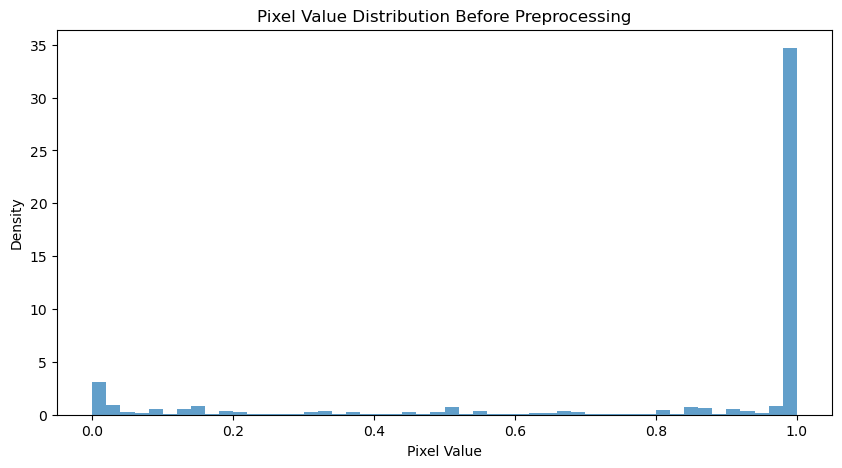

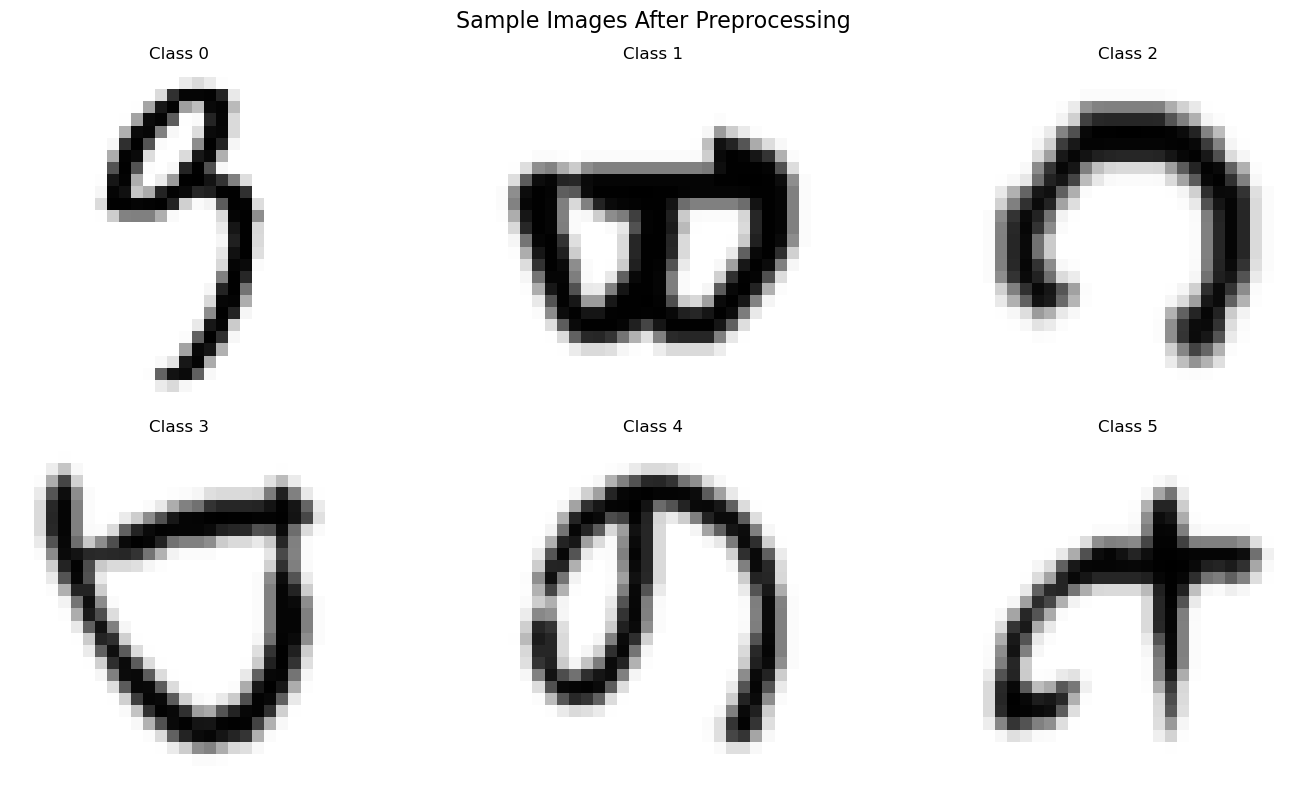


Image Statistics After Preprocessing:
Image shape: (28, 28, 1)
Pixel value range: [0.0, 0.003921568859368563]
Mean pixel value: 0.00
Std pixel value: 0.00


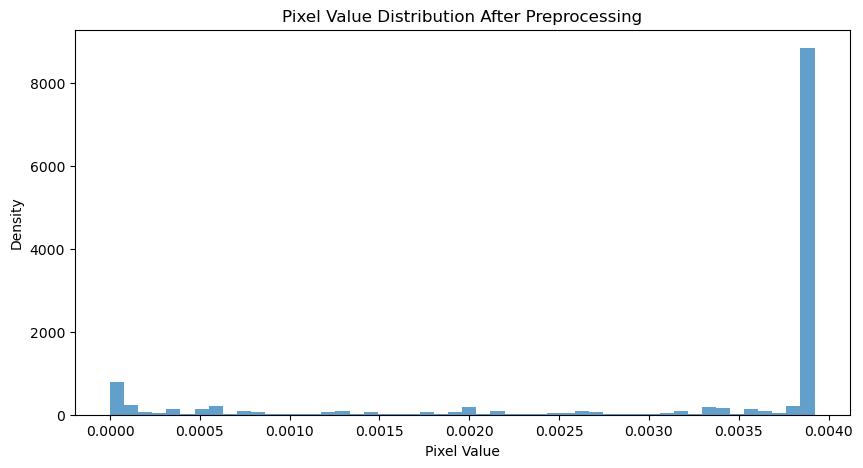


Visualization of possible augmentations for TEST2 dataset:


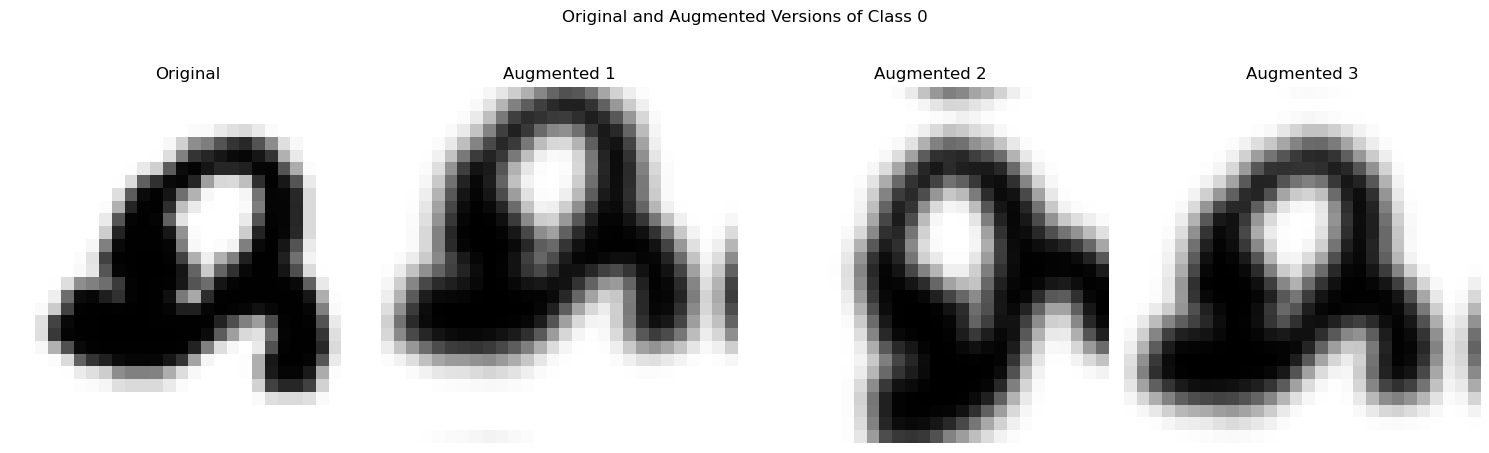

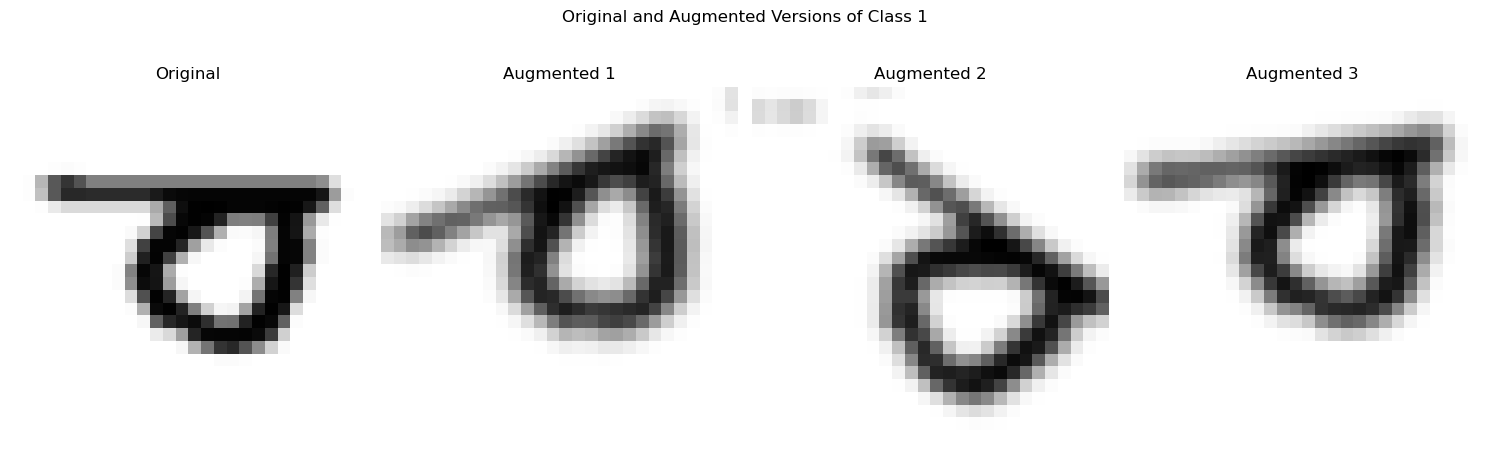

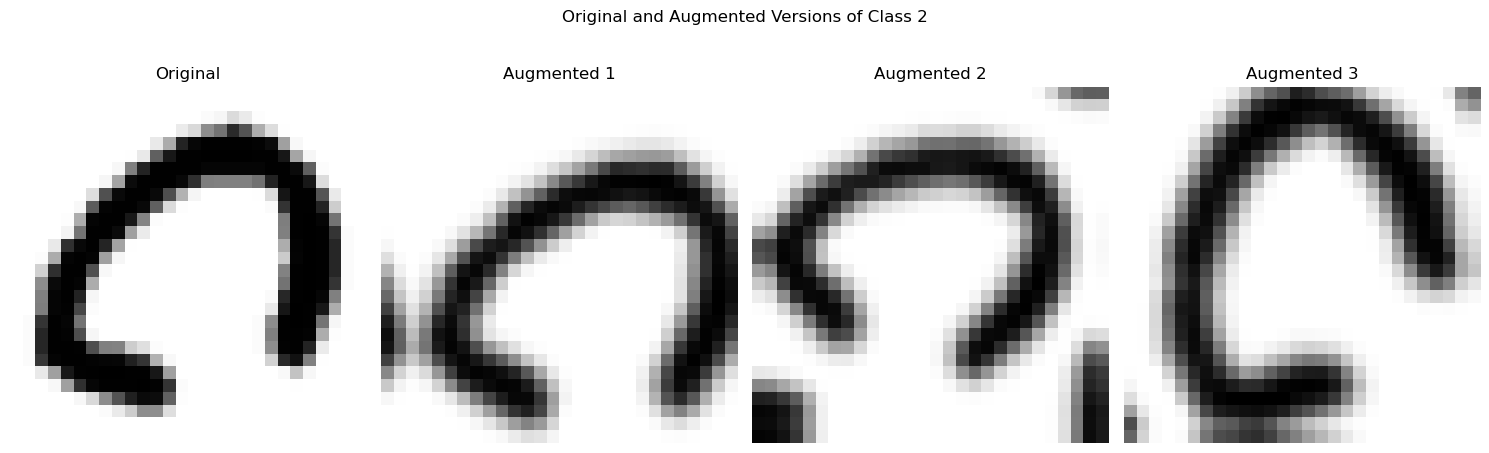

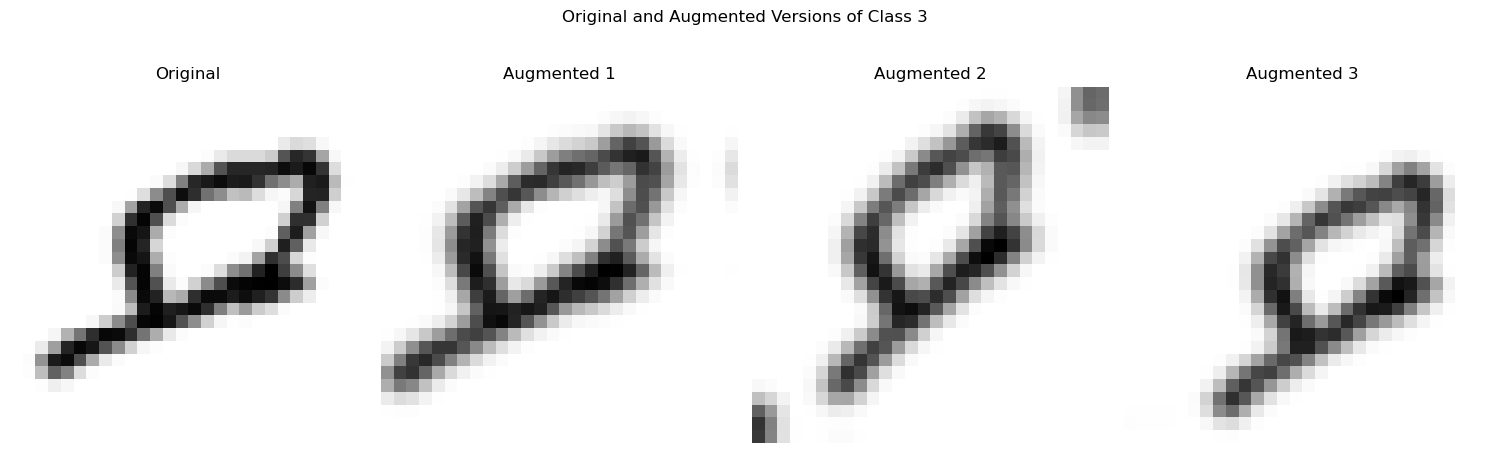

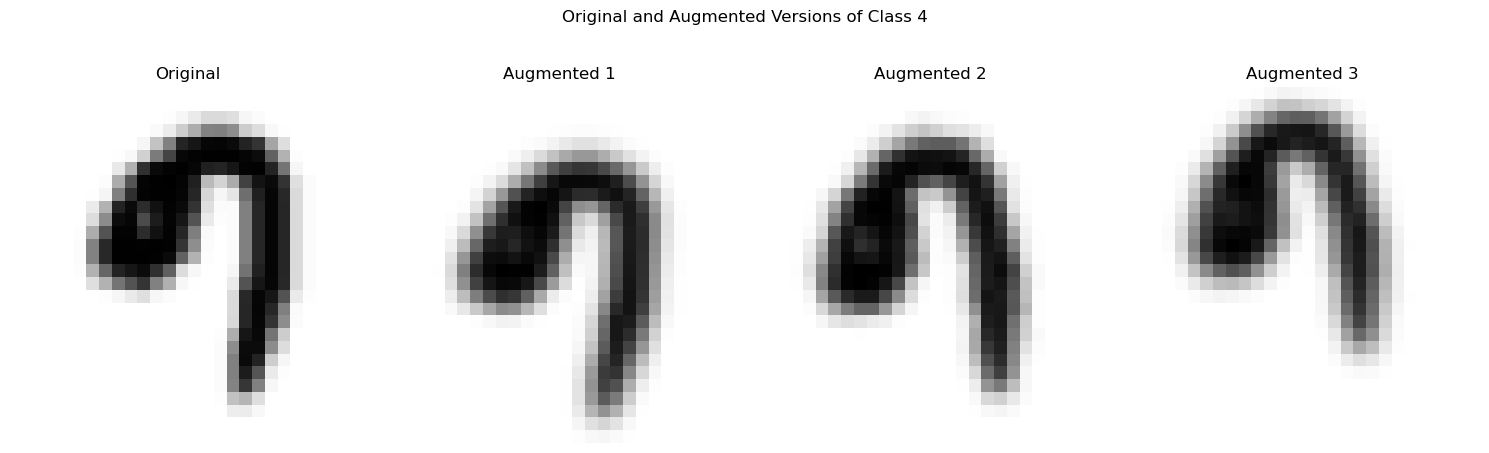

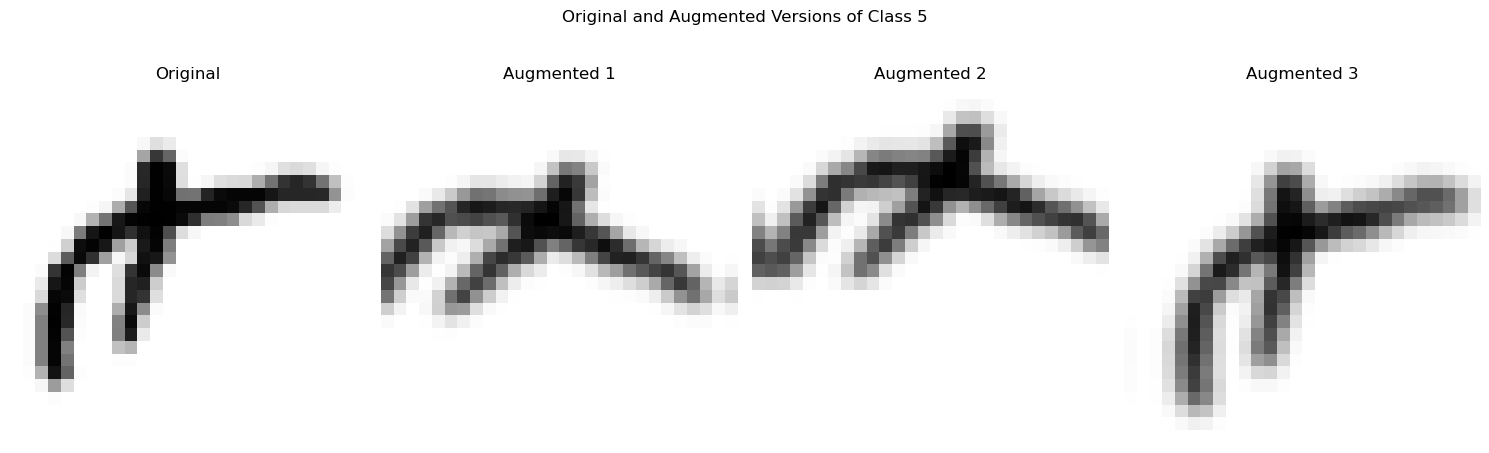

{'TRAIN': {'images': array([[[0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ]],
  
         [[0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , 

In [12]:
def analyze_dataset():
    """
    Perform complete dataset analysis for all sets
    """
    datasets = {
        'TRAIN': train_dir,
        'TEST': test_dir,
        'TEST2': test2_dir
    }
    
    results = {}
    for name, path in datasets.items():
        print(f"\n{'='*50}")
        print(f"Analyzing {name} dataset...")
        print('='*50)
        
        images, processed_images, labels = perform_eda(path)
        results[name] = {
            'images': images,
            'processed_images': processed_images,
            'labels': labels
        }
        
        # Visualize augmentations for one random image from each class
        print(f"\nVisualization of possible augmentations for {name} dataset:")
        for class_idx in range(6):
            class_indices = np.where(labels == class_idx)[0]
            if len(class_indices) > 0:
                sample_idx = np.random.choice(class_indices)
                visualize_augmentations(processed_images[sample_idx], class_idx)
    
    return results


analyze_dataset()

In [13]:
def train_and_evaluate():
    # Load and preprocess datasets using our preprocessing pipeline
    print("Loading and preprocessing datasets...")
    
    # Get preprocessed data for all datasets
    train_data = perform_eda(train_dir)
    test_data = perform_eda(test_dir)
    test2_data = perform_eda(test2_dir)
    
    # Extract preprocessed images and labels
    X_train = train_data[1]  # Index 1 contains preprocessed images
    y_train = train_data[2]  # Index 2 contains labels
    
    X_test = test_data[1]
    y_test = test_data[2]
    
    X_test2 = test2_data[1]
    y_test2 = test2_data[2]
    
    # Convert labels to categorical
    y_train = tf.keras.utils.to_categorical(y_train, 6)
    y_test = tf.keras.utils.to_categorical(y_test, 6)
    y_test2 = tf.keras.utils.to_categorical(y_test2, 6)
    
    # Create data augmentation layer
    data_augmentation = tf.keras.Sequential([
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),
    ])
    
    # Callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5
    )
    
    # Task 1: Initial Training
    print("Task 1: Training initial model...")
    model = create_model()
    
    # Create training data generator with augmentation
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(1000)
    train_dataset = train_dataset.map(
        lambda x, y: (data_augmentation(x, training=True), y),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
    
    # Create validation dataset
    val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
    
    # Train the model
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=20,
        callbacks=[early_stopping, reduce_lr]
    )
    
    # Evaluate on TEST
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'\nTEST accuracy: {test_acc*100:.2f}%')
    plot_results(history, model, X_test, y_test, "TEST")
    
    # Evaluate on TEST2
    test2_loss, test2_acc = model.evaluate(X_test2, y_test2)
    print(f'\nTEST2 accuracy: {test2_acc*100:.2f}%')
    plot_results(history, model, X_test2, y_test2, "TEST2")
    
    # Task 2: Fine-tuning with TEST data
    print("\nTask 2: Fine-tuning with TEST data...")
    fine_tuned_model = create_model()
    fine_tuned_model.set_weights(model.get_weights())
    
    # Freeze layers
    for layer in fine_tuned_model.layers[:-4]:
        layer.trainable = False
    
    fine_tuned_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Create fine-tuning datasets
    ft_train_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    ft_train_dataset = ft_train_dataset.shuffle(1000)
    ft_train_dataset = ft_train_dataset.map(
        lambda x, y: (data_augmentation(x, training=True), y),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    ft_train_dataset = ft_train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
    
    ft_val_dataset = tf.data.Dataset.from_tensor_slices((X_test2, y_test2))
    ft_val_dataset = ft_val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
    
    # Fine-tune the model
    history_ft = fine_tuned_model.fit(
        ft_train_dataset,
        validation_data=ft_val_dataset,
        epochs=20,
        callbacks=[early_stopping, reduce_lr]
    )
    
    # Evaluate fine-tuned model on TEST
    test_loss_ft, test_acc_ft = fine_tuned_model.evaluate(X_test, y_test)
    print(f'\nTEST accuracy after fine-tuning: {test_acc_ft*100:.2f}%')
    plot_results(history_ft, fine_tuned_model, X_test, y_test, "TEST after fine-tuning")
    
    # Evaluate fine-tuned model on TEST2
    test2_loss_ft, test2_acc_ft = fine_tuned_model.evaluate(X_test2, y_test2)
    print(f'\nTEST2 accuracy after fine-tuning: {test2_acc_ft*100:.2f}%')
    plot_results(history_ft, fine_tuned_model, X_test2, y_test2, "TEST2 after fine-tuning")
    
    return model, fine_tuned_model

Loading and preprocessing datasets...

Dataset Statistics for C:\Users\ADMIN\Downloads\ANN_WS24_Assignment\TRAIN:
Total number of images: 36000
Number of classes: 6
Class 0: 6000 images
Class 1: 6000 images
Class 2: 6000 images
Class 3: 6000 images
Class 4: 6000 images
Class 5: 6000 images


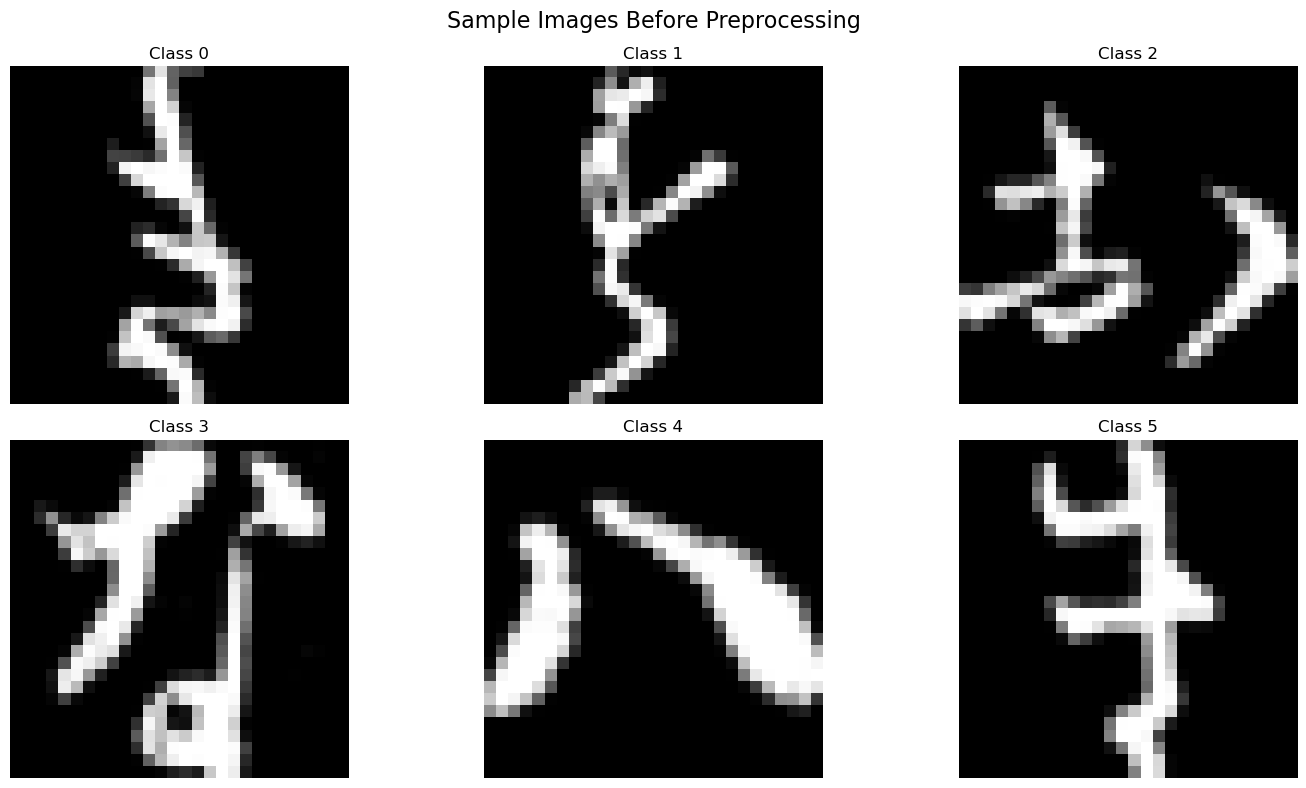


Image Statistics Before Preprocessing:
Image shape: (28, 28)
Pixel value range: [0.0, 1.0]
Mean pixel value: 0.19
Std pixel value: 0.35


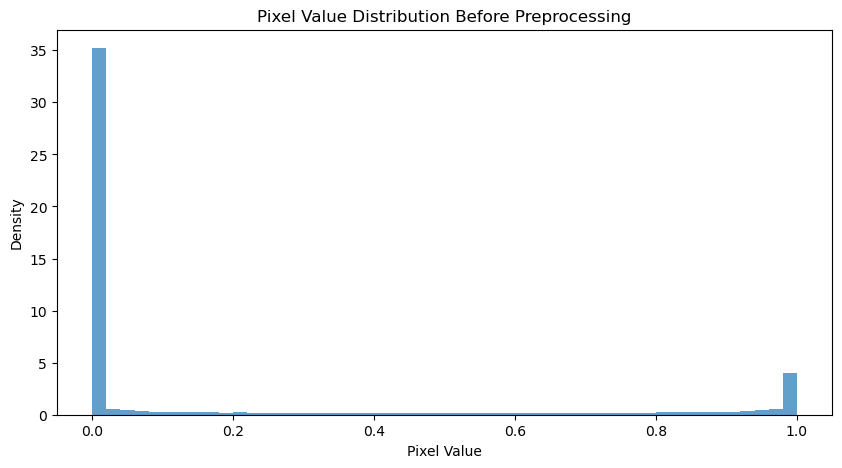

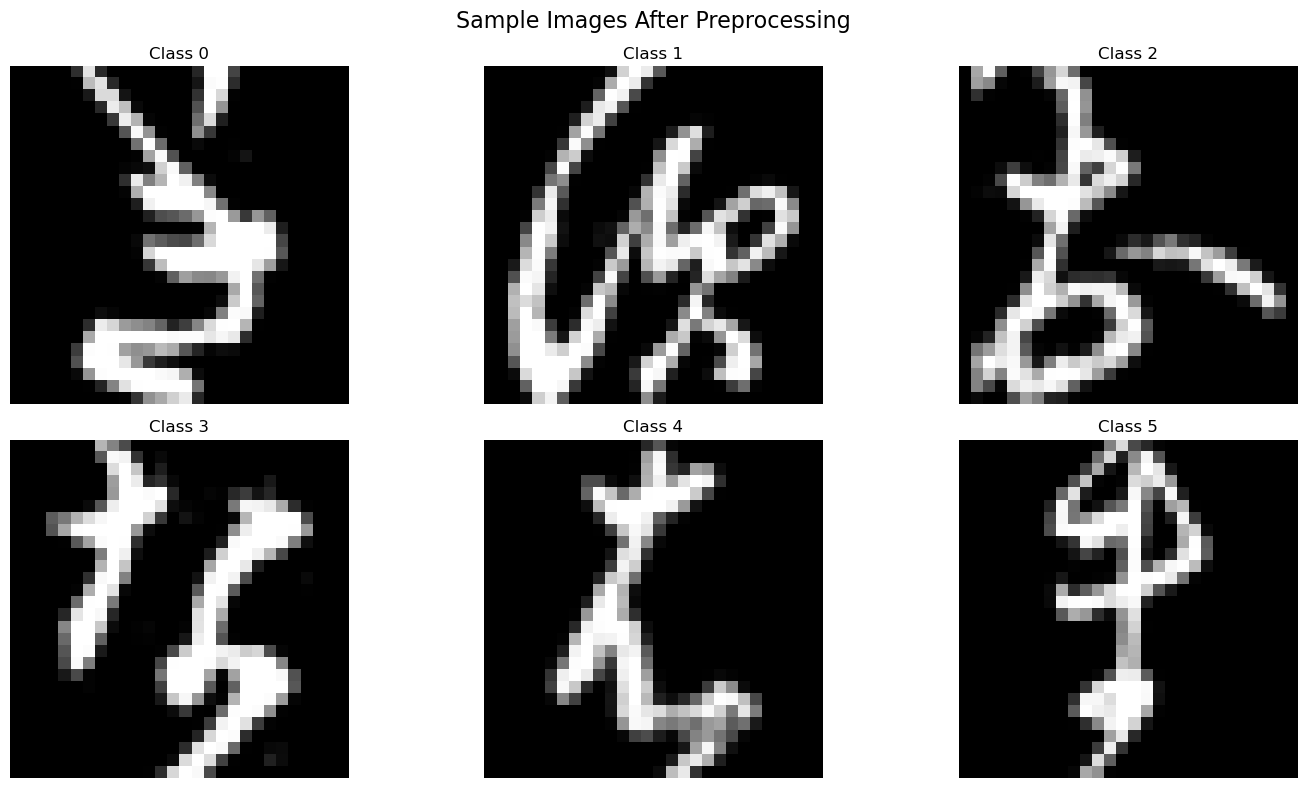


Image Statistics After Preprocessing:
Image shape: (28, 28, 1)
Pixel value range: [0.0, 0.003921568859368563]
Mean pixel value: 0.00
Std pixel value: 0.00


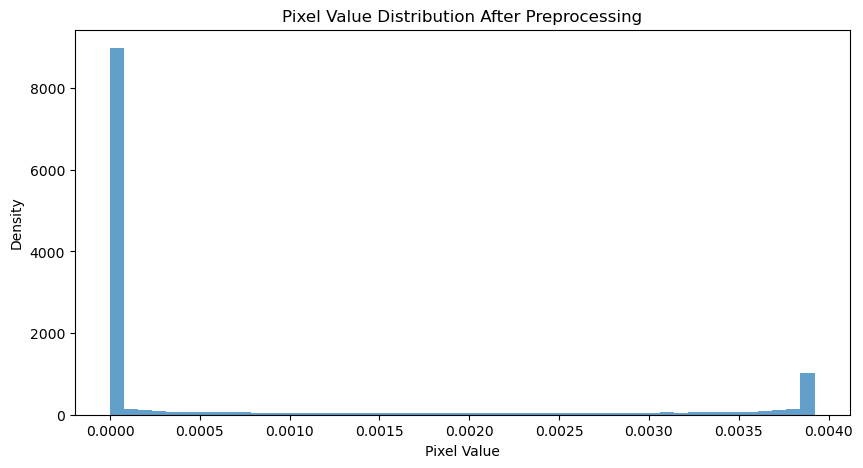


Dataset Statistics for C:\Users\ADMIN\Downloads\ANN_WS24_Assignment\TEST:
Total number of images: 6000
Number of classes: 6
Class 0: 1000 images
Class 1: 1000 images
Class 2: 1000 images
Class 3: 1000 images
Class 4: 1000 images
Class 5: 1000 images


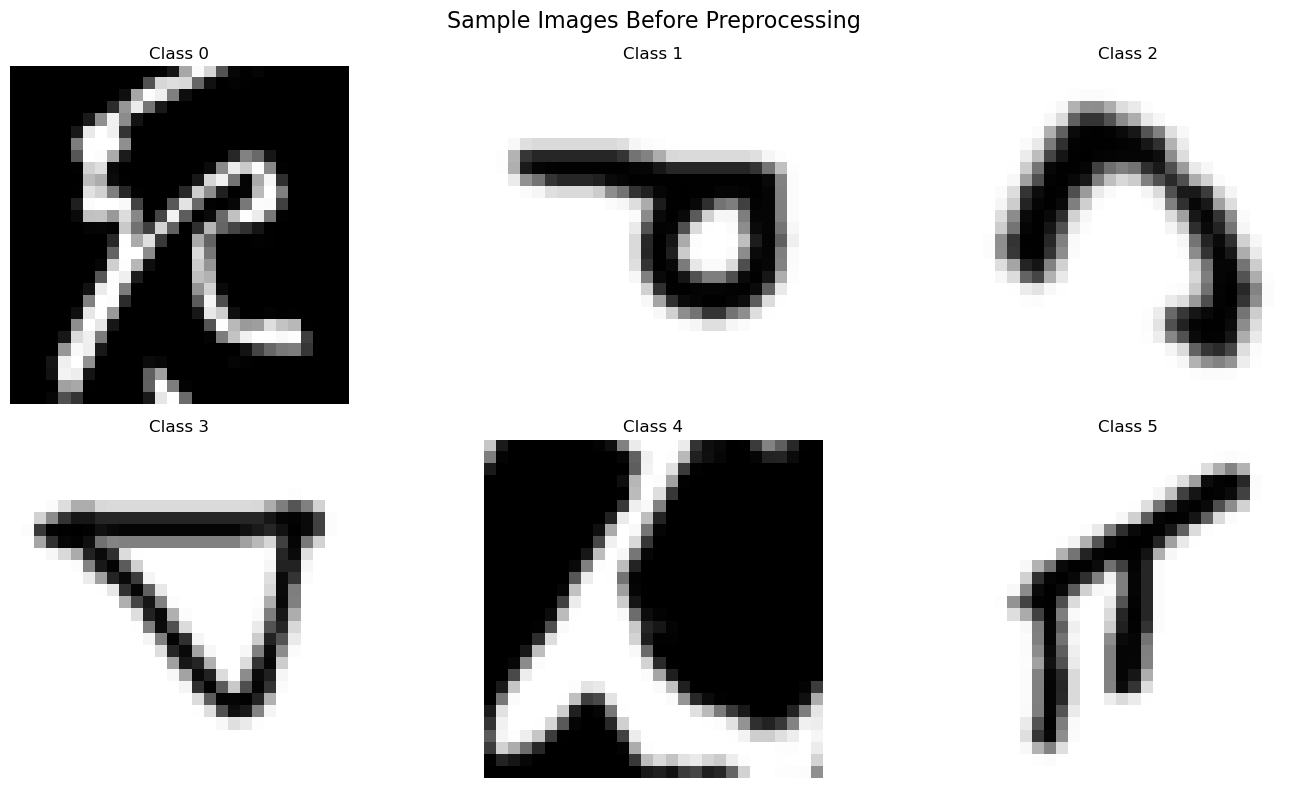


Image Statistics Before Preprocessing:
Image shape: (28, 28)
Pixel value range: [0.0, 1.0]
Mean pixel value: 0.50
Std pixel value: 0.47


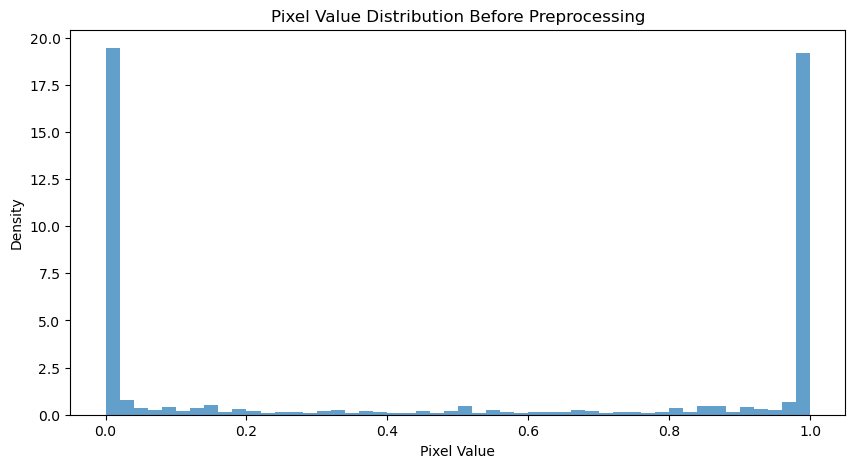

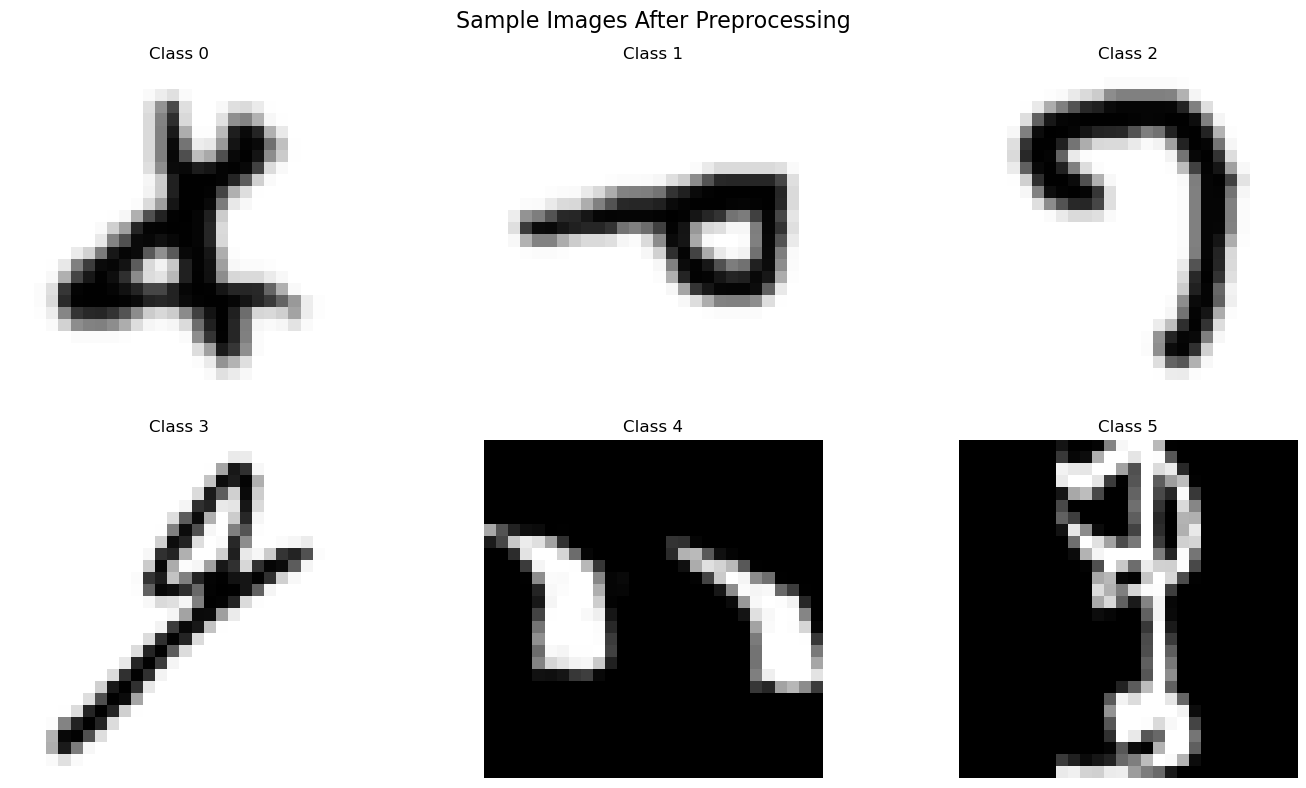


Image Statistics After Preprocessing:
Image shape: (28, 28, 1)
Pixel value range: [0.0, 0.003921568859368563]
Mean pixel value: 0.00
Std pixel value: 0.00


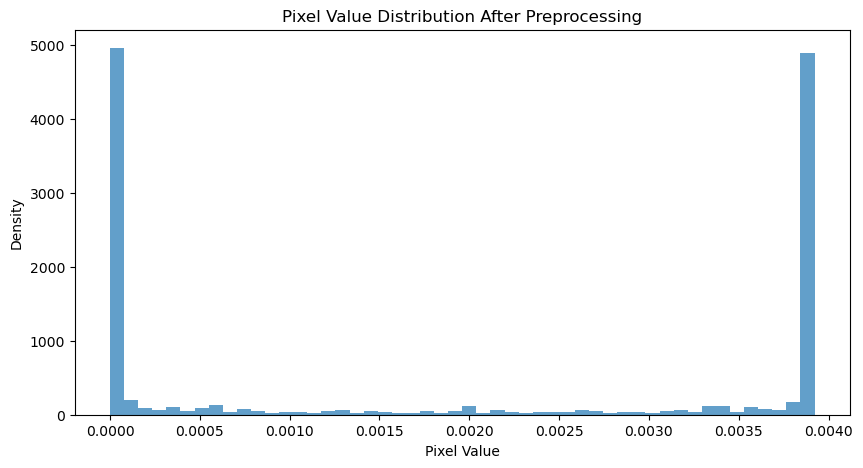


Dataset Statistics for C:\Users\ADMIN\Downloads\ANN_WS24_Assignment\TEST2:
Total number of images: 6000
Number of classes: 6
Class 0: 1000 images
Class 1: 1000 images
Class 2: 1000 images
Class 3: 1000 images
Class 4: 1000 images
Class 5: 1000 images


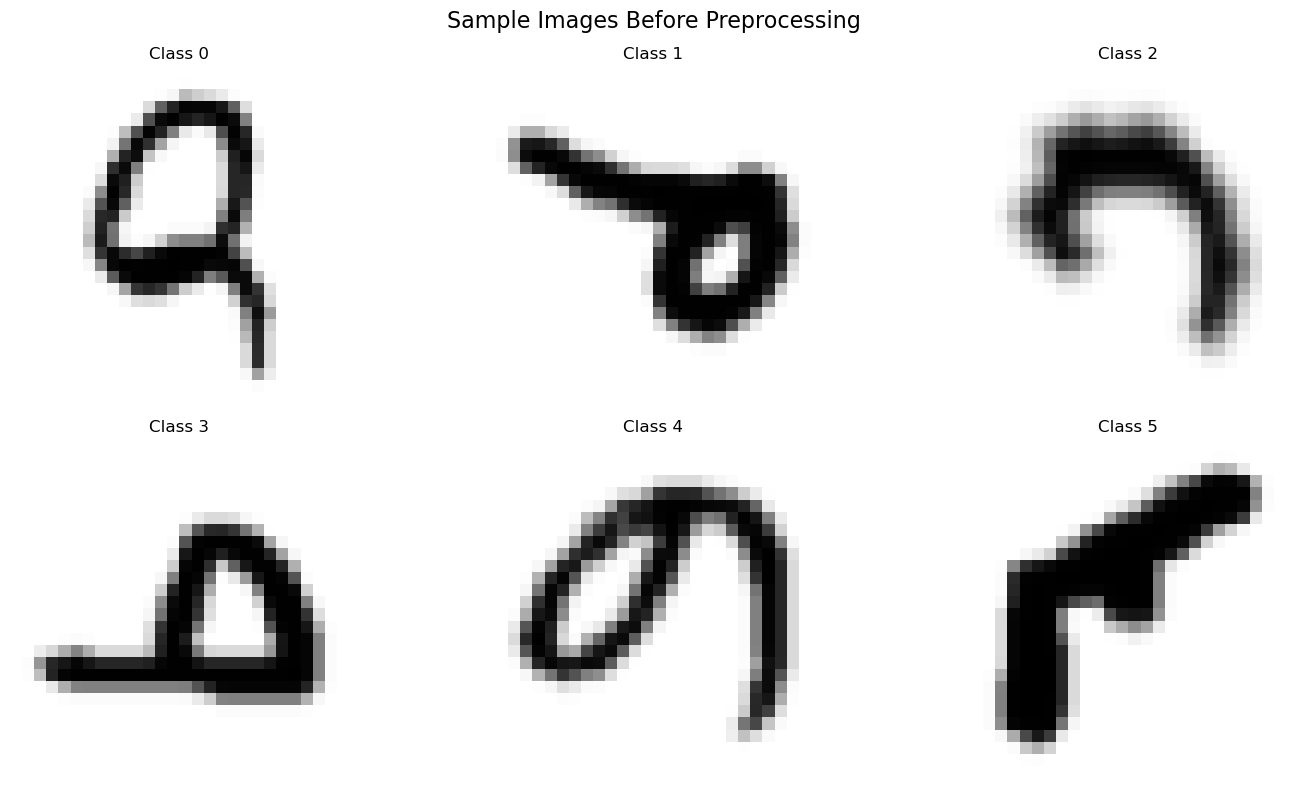


Image Statistics Before Preprocessing:
Image shape: (28, 28)
Pixel value range: [0.0, 1.0]
Mean pixel value: 0.81
Std pixel value: 0.34


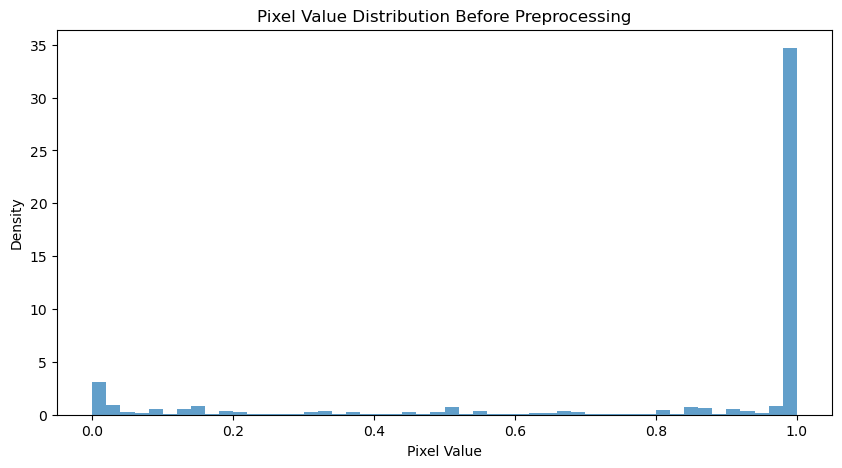

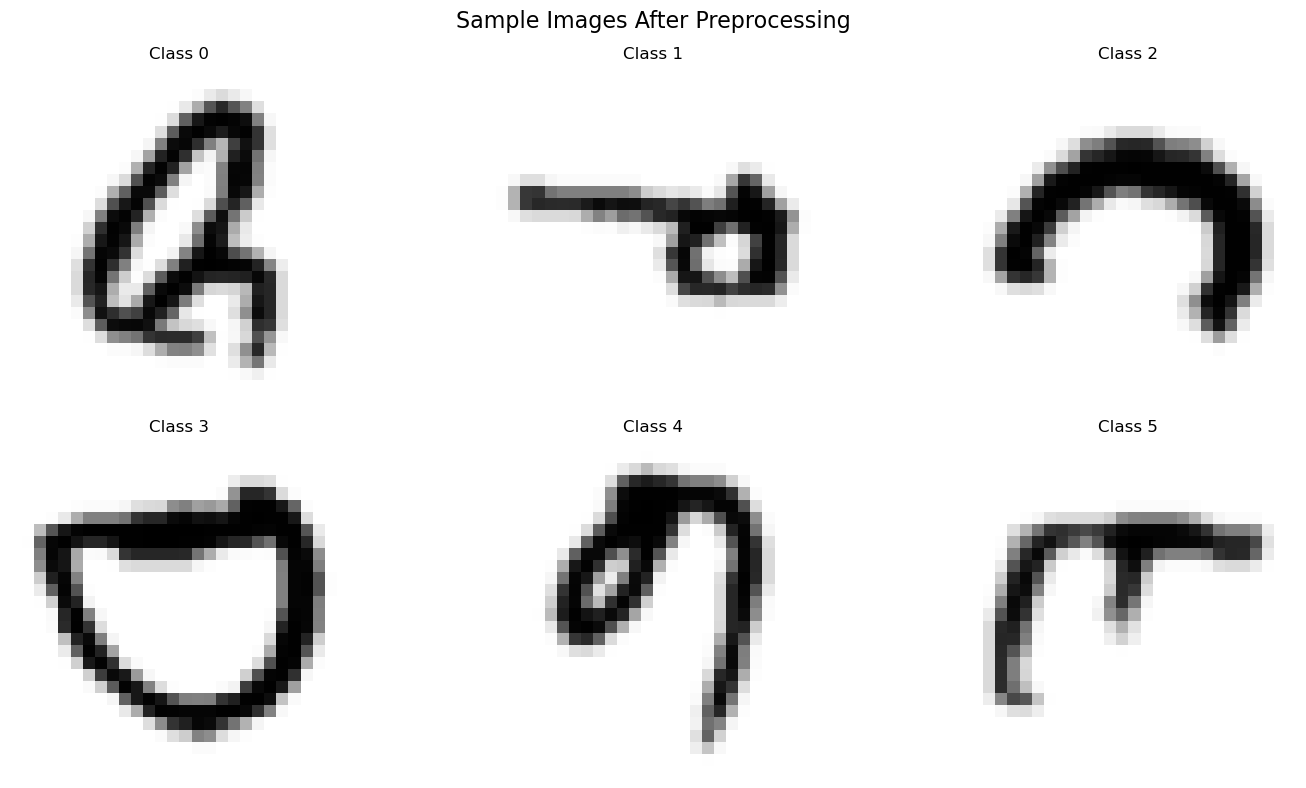


Image Statistics After Preprocessing:
Image shape: (28, 28, 1)
Pixel value range: [0.0, 0.003921568859368563]
Mean pixel value: 0.00
Std pixel value: 0.00


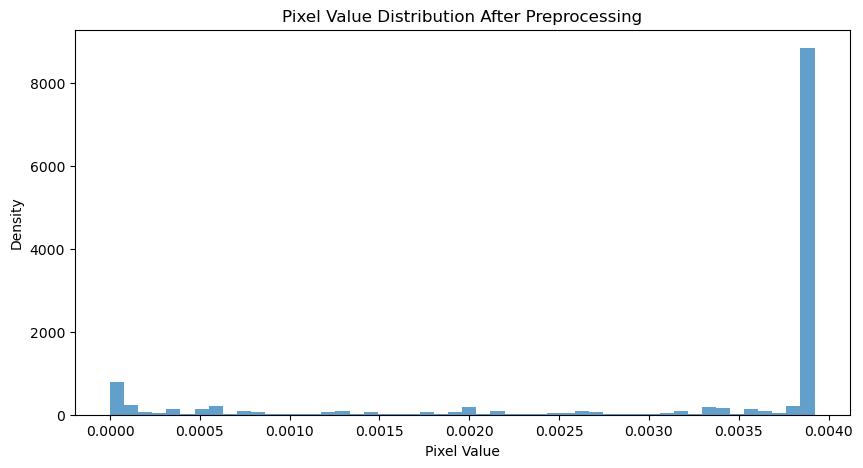

Task 1: Training initial model...


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 54s 41ms/step - accuracy: 0.7151 - loss: 1.0270 - val_accuracy: 0.1667 - val_loss: 11.1956 - learning_rate: 0.0010
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 48s 42ms/step - accuracy: 0.8013 - loss: 0.9240 - val_accuracy: 0.1662 - val_loss: 7.9680 - learning_rate: 0.0010
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 46s 41ms/step - accuracy: 0.8231 - loss: 0.7989 - val_accuracy: 0.1667 - val_loss: 10.9533 - learning_rate: 0.0010
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 45s 40ms/step - accuracy: 0.8376 - loss: 0.7140 - val_accuracy: 0.1667 - val_loss: 5.6127 - learning_rate: 0.0010
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 47s 41ms/step - accuracy: 0.8372 - loss: 0.6992 - val_accuracy: 0.1678 - val_loss: 8.2018 - learning_rate: 0.0010
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 46s 41ms/step - accuracy: 0.8439 - loss: 0.6279 - val_accuracy: 0.1790 - val_loss: 7.9646 - learning_rate: 0.0010
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 54s 48ms/step - accu

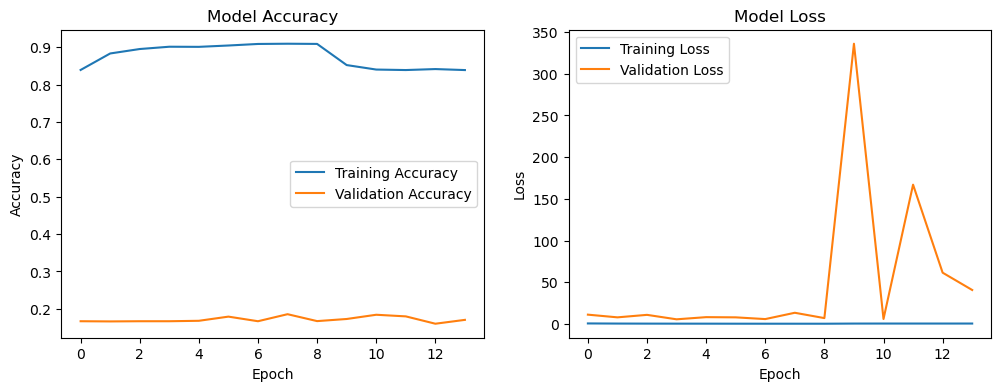

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


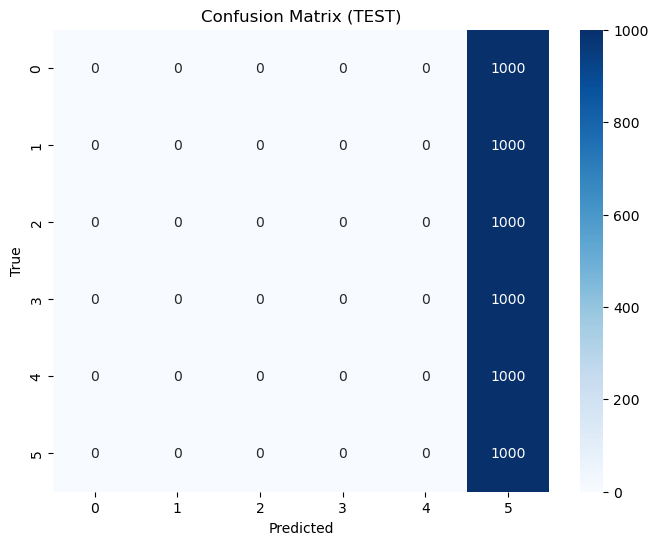

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0164 - loss: 7.7719

TEST2 accuracy: 16.67%


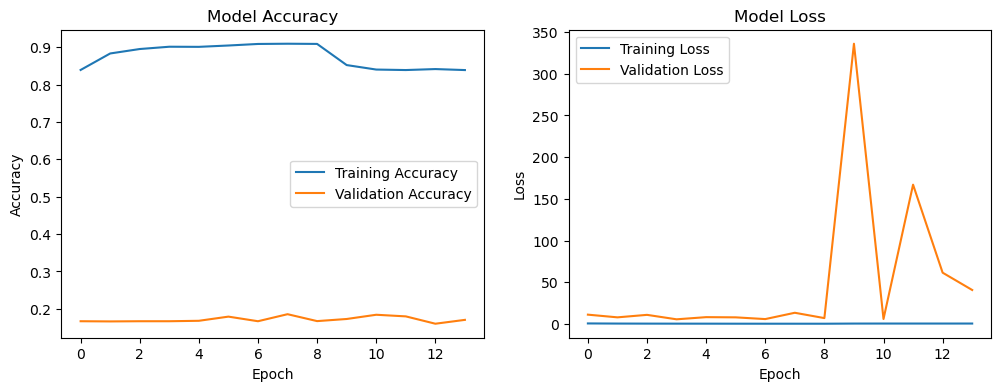

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


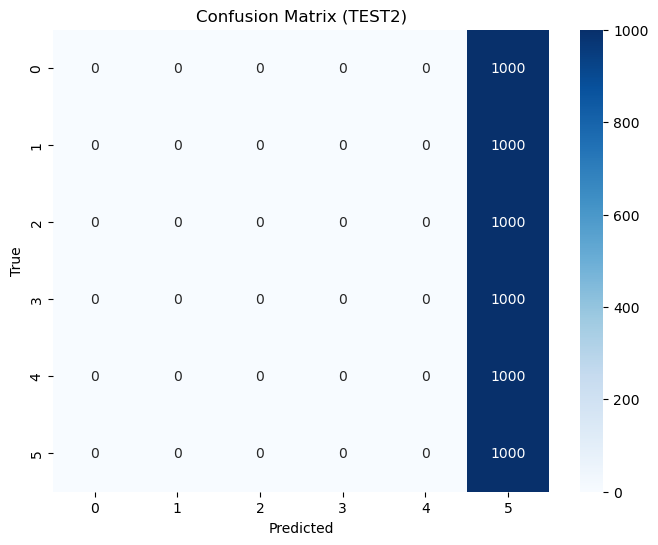


Task 2: Fine-tuning with TEST data...


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.0271 - loss: 6.9221 - val_accuracy: 0.1667 - val_loss: 5.9139 - learning_rate: 1.0000e-04
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0268 - loss: 5.3151 - val_accuracy: 0.1667 - val_loss: 4.0403 - learning_rate: 1.0000e-04
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.0274 - loss: 4.0161 - val_accuracy: 0.1667 - val_loss: 2.7410 - learning_rate: 1.0000e-04
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.0316 - loss: 3.1003 - val_accuracy: 0.1667 - val_loss: 2.0992 - learning_rate: 1.0000e-04
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.0400 - loss: 2.5706 - val_accuracy: 0.1667 - val_loss: 1.8611 - learning_rate: 1.0000e-04
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.0578 - loss: 2.2779 - val_accuracy: 0.1702 - val_loss: 1.7625 - learning_rate: 1.0000e-04
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc

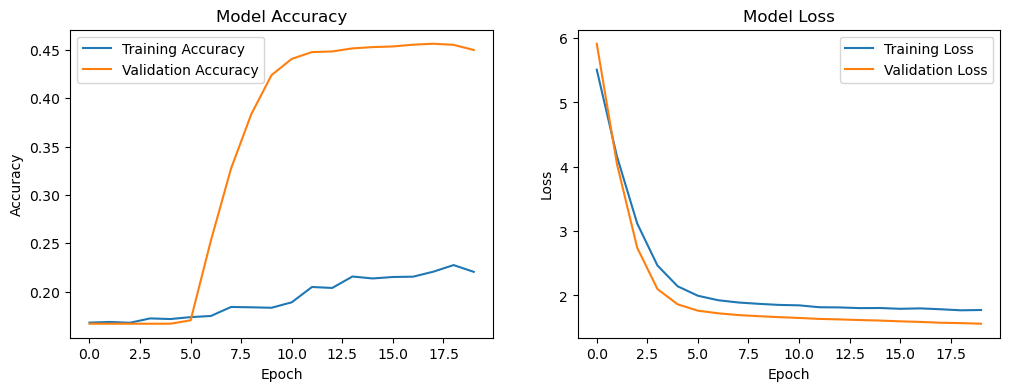

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


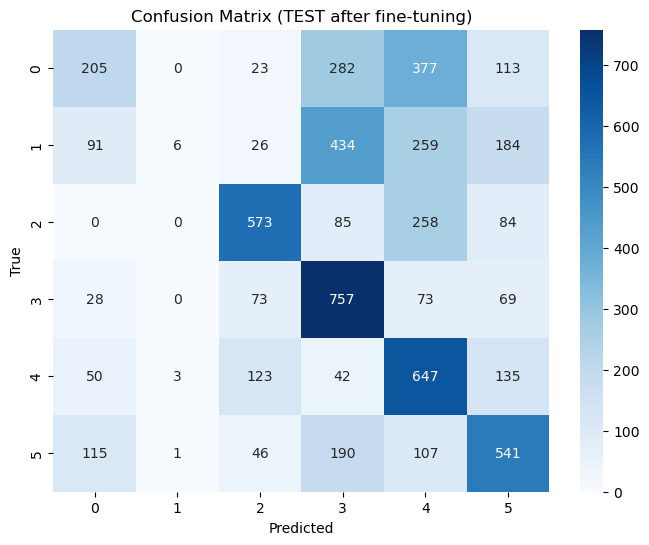

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1863 - loss: 1.7139

TEST2 accuracy after fine-tuning: 44.98%


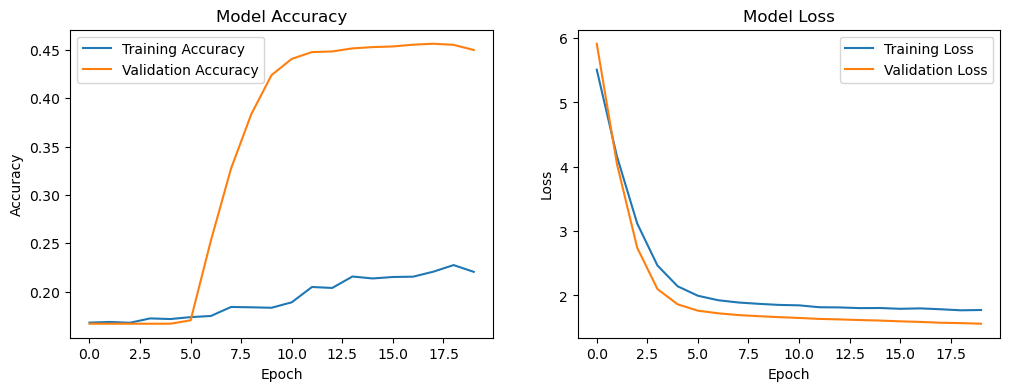

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


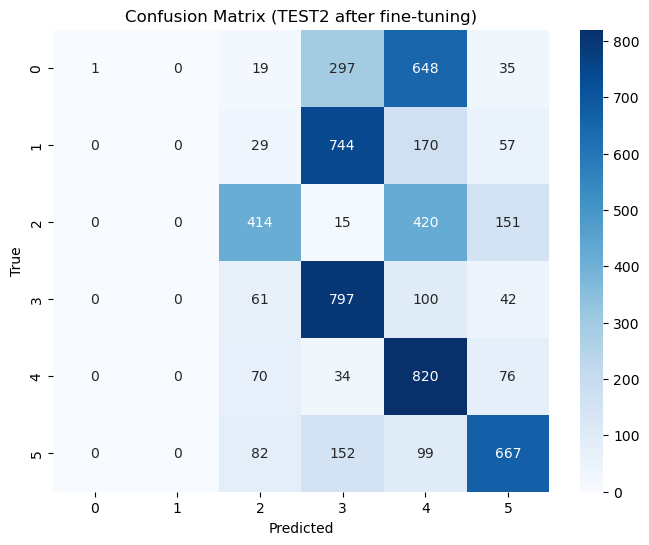

In [16]:
def plot_results(history, model, X_test, y_test, dataset_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()

if __name__ == "__main__":
    train_and_evaluate()

In [19]:
def train_and_evaluate():
    # Load datasets
    X_train, y_train = load_dataset(train_dir)
    X_test, y_test = load_dataset(test_dir)
    X_test2, y_test2 = load_dataset(test2_dir)

    # Reshape and normalize
    X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
    X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
    X_test2 = X_test2.reshape(-1, 28, 28, 1) / 255.0

    # Convert labels
    y_train = tf.keras.utils.to_categorical(y_train, 6)
    y_test = tf.keras.utils.to_categorical(y_test, 6)
    y_test2 = tf.keras.utils.to_categorical(y_test2, 6)

    # Callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    # Task 1: Initial Training
    print("Task 1: Training initial model...")
    model = create_model()

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr]
    )

    # Evaluate on TEST
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'\nTEST accuracy: {test_acc*100:.2f}%')
    plot_results(history, model, X_test, y_test, "TEST")

    # Evaluate on TEST2
    test2_loss, test2_acc = model.evaluate(X_test2, y_test2)
    print(f'\nTEST2 accuracy: {test2_acc*100:.2f}%')
    plot_results(history, model, X_test2, y_test2, "TEST2")

    # Task 2: Fine-tuning with TEST data
    print("\nTask 2: Fine-tuning with TEST data...")
    fine_tuned_model = create_model()
    fine_tuned_model.set_weights(model.get_weights())

    # Freeze layers
    for layer in fine_tuned_model.layers[:-4]:
        layer.trainable = False

    fine_tuned_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history_ft = fine_tuned_model.fit(
        X_test, y_test,
        validation_data=(X_test2, y_test2),
        epochs=20,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr]
    )

    # Evaluate fine-tuned model on TEST
    test_loss_ft, test_acc_ft = fine_tuned_model.evaluate(X_test, y_test)
    print(f'\nTEST accuracy after fine-tuning: {test_acc_ft*100:.2f}%')
    plot_results(history_ft, fine_tuned_model, X_test, y_test, "TEST after fine-tuning")

    # Evaluate fine-tuned model on TEST2
    test2_loss_ft, test2_acc_ft = fine_tuned_model.evaluate(X_test2, y_test2)
    print(f'\nTEST2 accuracy after fine-tuning: {test2_acc_ft*100:.2f}%')
    plot_results(history_ft, fine_tuned_model, X_test2, y_test2, "TEST2 after fine-tuning")

Task 1: Training initial model...


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 120s 91ms/step - accuracy: 0.8131 - loss: 0.5990 - val_accuracy: 0.5283 - val_loss: 2.2217 - learning_rate: 0.0010
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.9439 - loss: 0.1702 - val_accuracy: 0.3332 - val_loss: 3.8855 - learning_rate: 0.0010
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 88s 78ms/step - accuracy: 0.9589 - loss: 0.1229 - val_accuracy: 0.5417 - val_loss: 2.7627 - learning_rate: 0.0010
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 94s 84ms/step - accuracy: 0.9690 - loss: 0.0952 - val_accuracy: 0.3917 - val_loss: 3.7090 - learning_rate: 0.0010
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 86s 76ms/step - accuracy: 0.9720 - loss: 0.0826 - val_accuracy: 0.2862 - val_loss: 6.5307 - learning_rate: 0.0010
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 86s 77ms/step - accuracy: 0.9761 - loss: 0.0708 - val_accuracy: 0.4423 - val_loss: 5.2302 - learning_rate: 0.0010
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 86s 77ms/step - accur

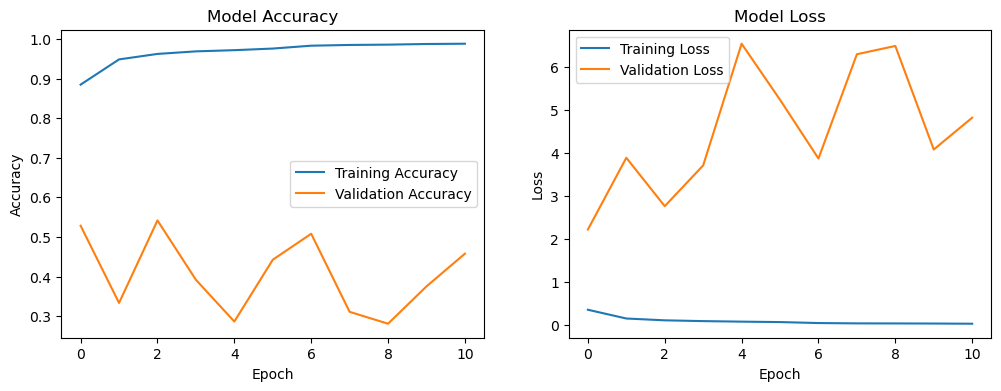

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step


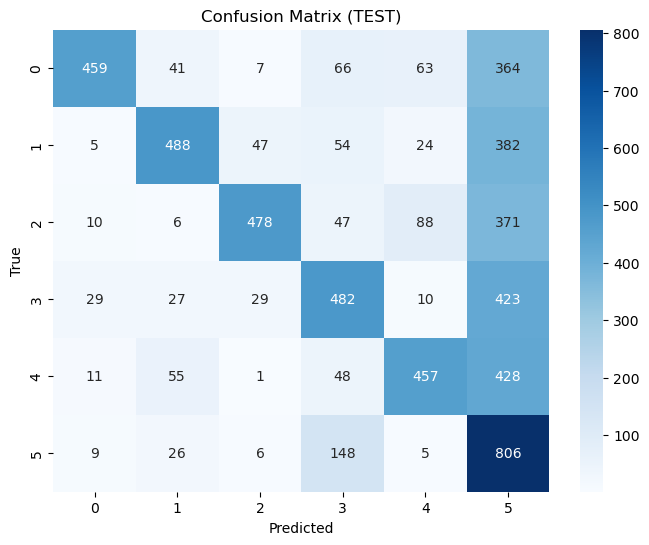

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.0331 - loss: 4.6698

TEST2 accuracy: 14.28%


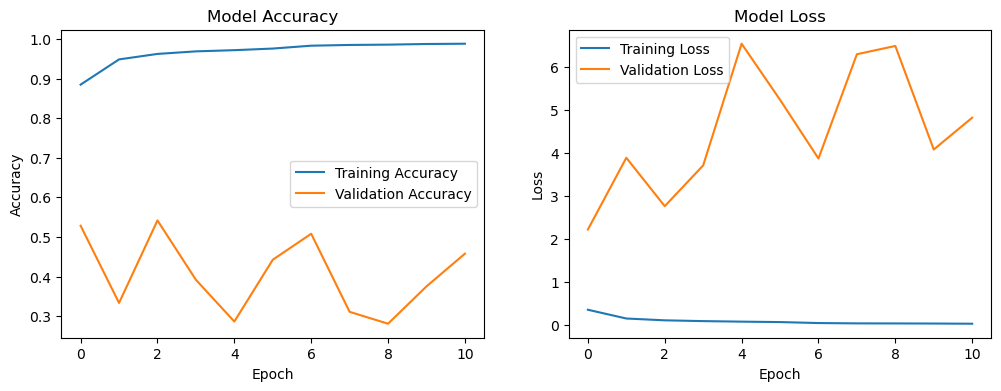

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step


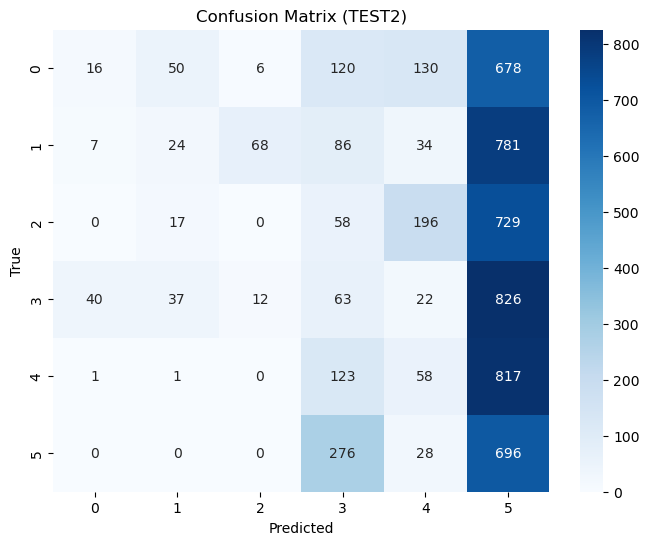


Task 2: Fine-tuning with TEST data...


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.5295 - loss: 1.9132 - val_accuracy: 0.5417 - val_loss: 1.2361 - learning_rate: 1.0000e-04
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.6521 - loss: 1.0386 - val_accuracy: 0.7038 - val_loss: 0.8348 - learning_rate: 1.0000e-04
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7263 - loss: 0.7912 - val_accuracy: 0.7805 - val_loss: 0.6630 - learning_rate: 1.0000e-04
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7447 - loss: 0.7131 - val_accuracy: 0.8197 - val_loss: 0.5600 - learning_rate: 1.0000e-04
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.7768 - loss: 0.6290 - val_accuracy: 0.8465 - val_loss: 0.4957 - learning_rate: 1.0000e-04
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7861 - loss: 0.5956 - val_accuracy: 0.8627 - val_loss: 0.4521 - learning_rate: 1.0000e-04
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step -

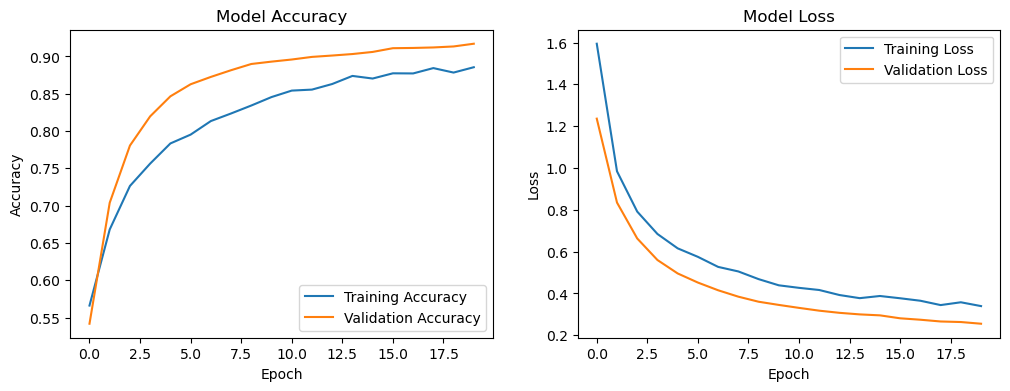

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step


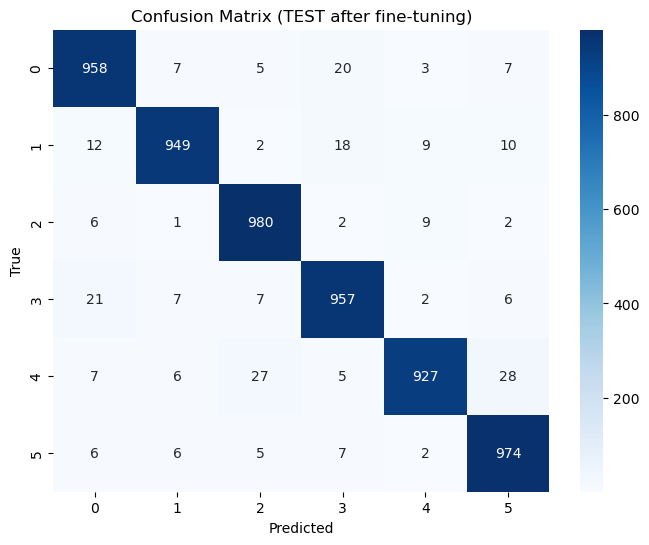

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9021 - loss: 0.2869

TEST2 accuracy after fine-tuning: 91.70%


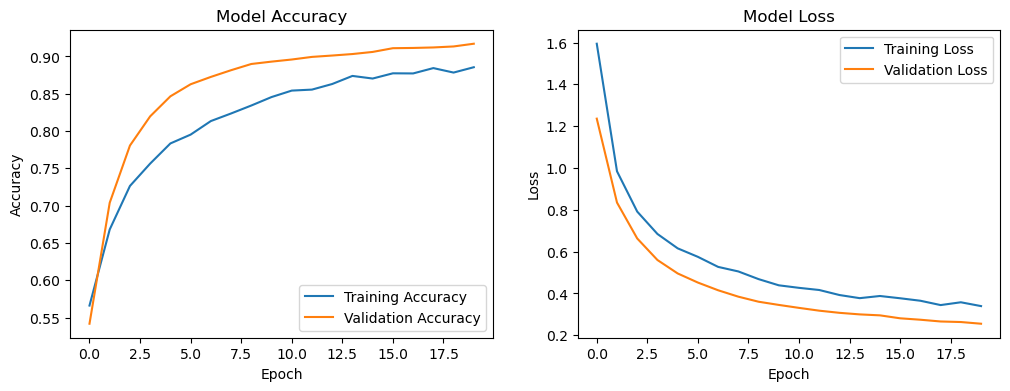

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


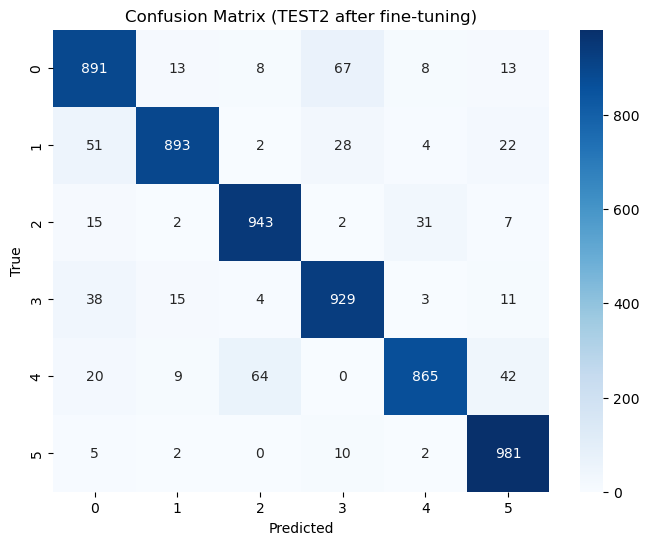

In [20]:
def plot_results(history, model, X_test, y_test, dataset_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()

if __name__ == "__main__":
    train_and_evaluate()